# Exploratory Data Analysis Project

### (Completed by - Dhruv Tewari)

A csv file with a dataset from a research study where men & women walked for 90 minutes on a treadmill in a hot (35C) environment, 3 different times where only the relative humidity changed. Subjects completed trials at 55, 70, and 85% at the same walking speed and ambient temperature. Answer the questions below (#1-12) about what you see in the dataset.

### Coding challenge:



### 1) Describe the dataset-- what do you notice about the dataset? Are there outliers, missing data, etc?

### 2) Would you remove any data or impute any values? If so, why?

### 3) Are any of the variables correlated? If so, why do you think that they are correlated physiologically- what might this tell you about people's responses to increasing relative humidty?

### 5) Are there are differences between males & females? If so, what are they? What do they mean within the context of this study, physiologically? (Feel free to run any statistical analyses here if you feel they are appropriate).

### 6) The MaxHR (maximum heart rate) is calculated for each subject, and it is based on their age-predicted max HR. 

### For each HR value (HR column), calculate that person's percent of their max HR. This is a rough estimate of how hard they are working. What can you infer about the work rate or intensity/effort in this study?

### 7) Are there differences between subjects' HR zones? What about differences across RH (relative humidity) or Time- the independent variables in this study?

### Generally, at core temperatures exceeding 38.2C, we want to tell workers to stop working. 

### 8) How many times did someone exceed 38.2C?

### 9) What other things can you tell me about the environmental conditions or their physiological responses at that time point? (i.e. what was the humidity, HR zone, skin temp, etc)?

### 10) Create a figure where you can best see how core temperature changes over time in men vs. women, but also at the 3 different relative humidities. What insights can be gained from this graph? 

### 11) For each humidity, please analyze whether core temp is statistically different between men & women. 

### 12) Do you notice anything else (physiological insights) or about the dataset that you think is important?


Here are the variables in the dataset:

*Subject ID:*

   - This ID is unique to each subject. However, the males have IDs 1-13,
   and the females also have IDs 1-13. You can tell whether they are male or
   female from the "Sex" Column

*Time:*

   - This is simply time (in minutes) starting from time 0 (baseline
   measurement- the subject was not moving) to time 90, after 90 min of
   walking on the treadmill. All physiological data were collected every 5
   minutes throughout the 90 min trial (although there may be some missing
   data points).

*HR:*

   - Heart rate (HR) collected from a Polar chest strap


*Tc: *

   - Core temperature (ground truth; Tc) collected via rectal probe


*RH:*

   - Each subject completed 3 trials at relative humidities (RH) of 55, 70,
   and 85% RH on separate days


*Sex:*

   - Males = 0
   - Females = 1


*Max HR:*

   - Calculated as the subject's age-predicted Max HR based on equation:
   Max HR = 207 - (Age * 0.7) . 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting up the color pallet for the visulaization
my_pallet = ["#3498db","#9b59b6","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(my_pallet)

In [3]:
# This is to enlarge the width of the Juypter notebook for better visual experience
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))

# Making the visual more clear and increase the default size of any plot
matplotlib.rcParams['figure.figsize'] = (13,8)
matplotlib.rcParams['lines.linewidth'] = 2

%config InlineBackend.figure_format = 'retina'# for high resolution of the plots

## Coding Challenge 1 - 

## Describe the dataset-- what do you notice about the dataset? Are there outliers, missing data, etc?

In [4]:
# Creating a function for intital data analysis and find the characterstics of the givne dataset

#importing the dataset

dataset=pd.read_csv('KenzenDataAnalystDataSet.csv')

# Creating a function for initial analysis

def initial_analysis(dataset):
    
    #shape of the dataset
    
    print("\n The shape of the dataset:{}".format(dataset.shape))
    print("\n Number of columns in the dataset:{}".format(dataset.shape[1]))
    print("\n Number of rows in the dataset:{}".format(dataset.shape[0]))
    print("*"*45)
    
    # Numerical and Categorical feautres in the dataset
    
    numeric_features = dataset.select_dtypes(include = [np.number])
    categoric_features = dataset.select_dtypes(exclude = [np.number])
    print(" Number of Numerical Features : {}".format(numeric_features.shape[1]))
    print("\n Number of Categorical Features : {}".format(categoric_features.shape[1]))
    print("*"*40)
    
    # Missing values
    print(" Number of missing values :\n \n{}".format(dataset.isna().sum()))
    print("*"*40)
    
    # Checking the duplicates
    print("\n**The dataset has {} duplicate rows.**".format(dataset.duplicated().sum()))

In [1]:
# Calling the function on the dataset
initial_analysis(dataset)

NameError: name 'pd' is not defined

 ### Initial observations made during the primary analysis
 
 1. There are **1309** rows and **7** columns in the given dataset.
 
 2. There are **6 numerical** and **1 categorical** feature in the dataset.
 
         -The variable "Sex" is acually a categorical variable,but encoded as 
             . Males = 0
             . Females = 1
             hence the function is treating it as numerical

 3. The columns `HR`,`TC` and `RH` has missing values which we need to take care off.
 
 4. There are no duplicate data in the dataset.

### Outliers detection in dataset

In [6]:
# Creating a function for checking the outliers in the dataset

def outlier_detection(dataset):
   
    # Creating a for loop for the determiing the outliers upper and lower limit
    features = ['Time', 'HR', 'Tc','MaxHR']
    
    for i in features:
        stats=dataset[i].describe()
        IQR = stats['75%']-stats['25%']
        upper=stats['75%']+1.5*IQR
        lower=stats['25%']-1.5*IQR
        print('For feature {}. Upper bound : {:.2f} Lower Bound: {:.2f}'.format(i,upper,lower))
        #fig, ax= plt.subplots(3,2, sharex= False, sharey=False, figsize=(20,20))
        plt.figure(figsize=(16,6))
        plt.subplot(1,2,1)
        sns.boxplot(dataset[i])
        plt.xlabel(i,fontsize=12)
        plt.title("Outliers Analysis Box plot for {}".format(i), fontsize=15)
        plt.subplot(1,2,2)
        sns.distplot(dataset[i],bins=20)
        plt.xlabel(i,fontsize=12)
        plt.title("Outliers Analysis Distribution plot for {}".format(i), fontsize=15)
        plt.show()

For feature Time. Upper bound : 145.00 Lower Bound: -55.00


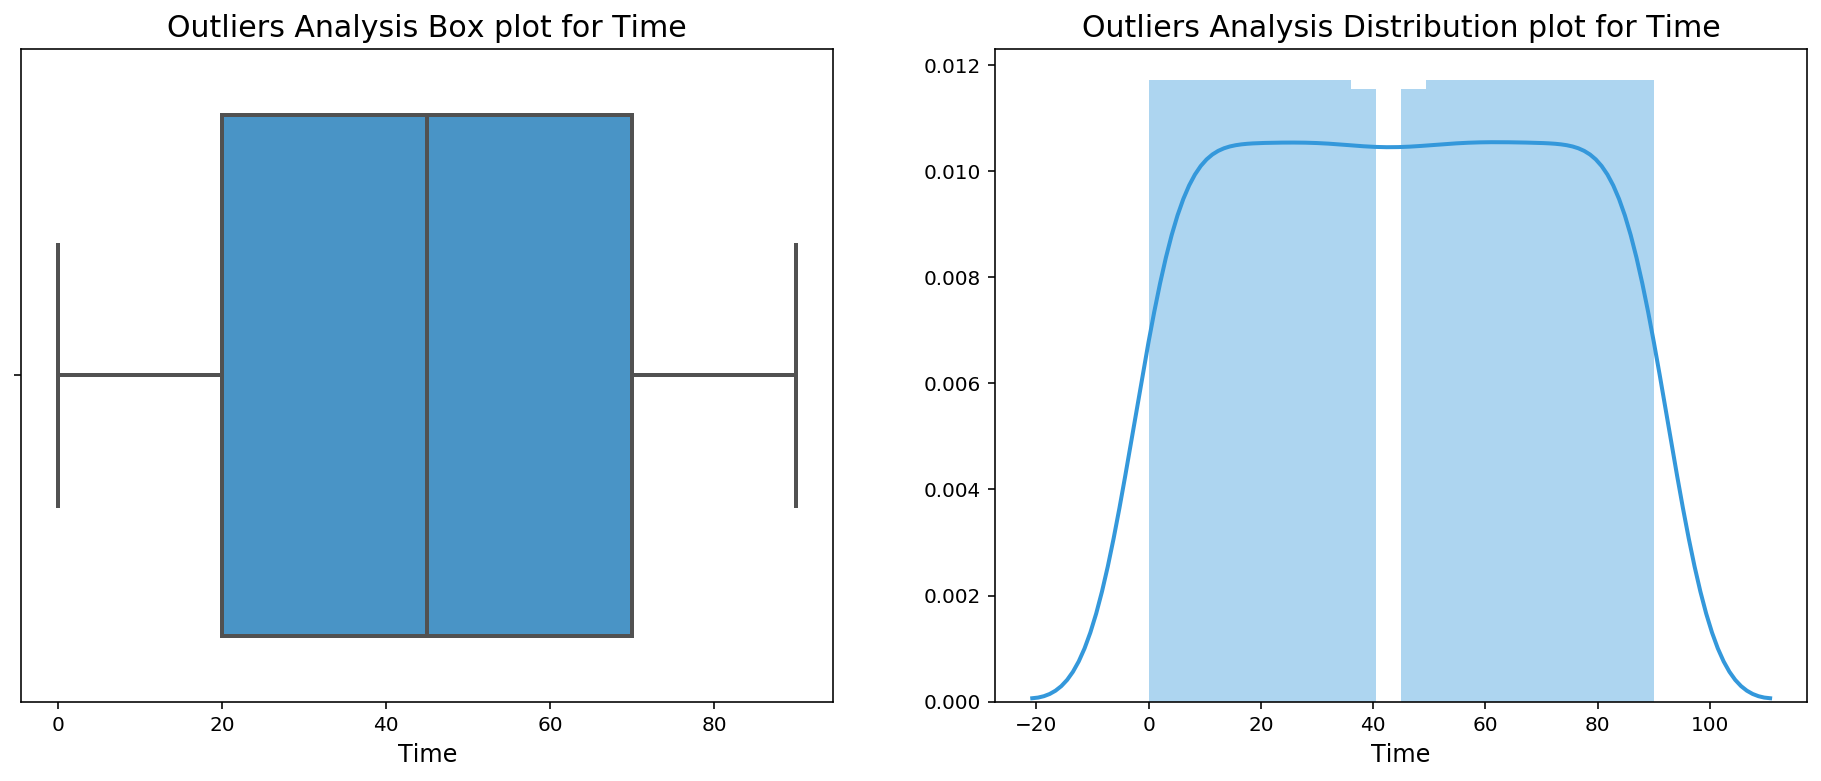

For feature HR. Upper bound : 168.00 Lower Bound: 72.00


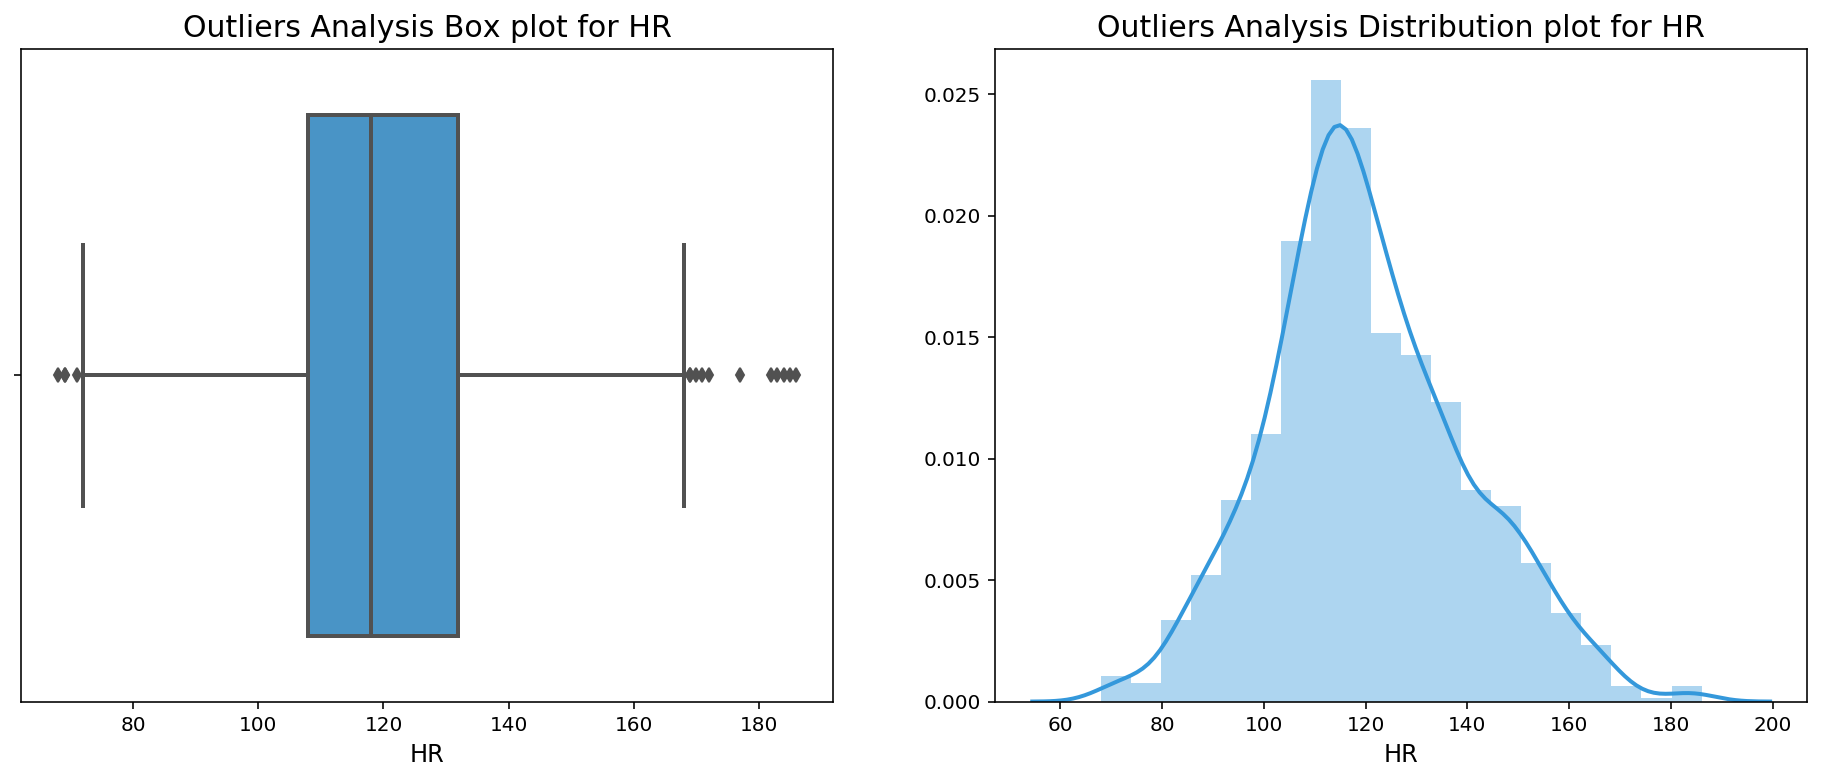

For feature Tc. Upper bound : 38.80 Lower Bound: 36.30


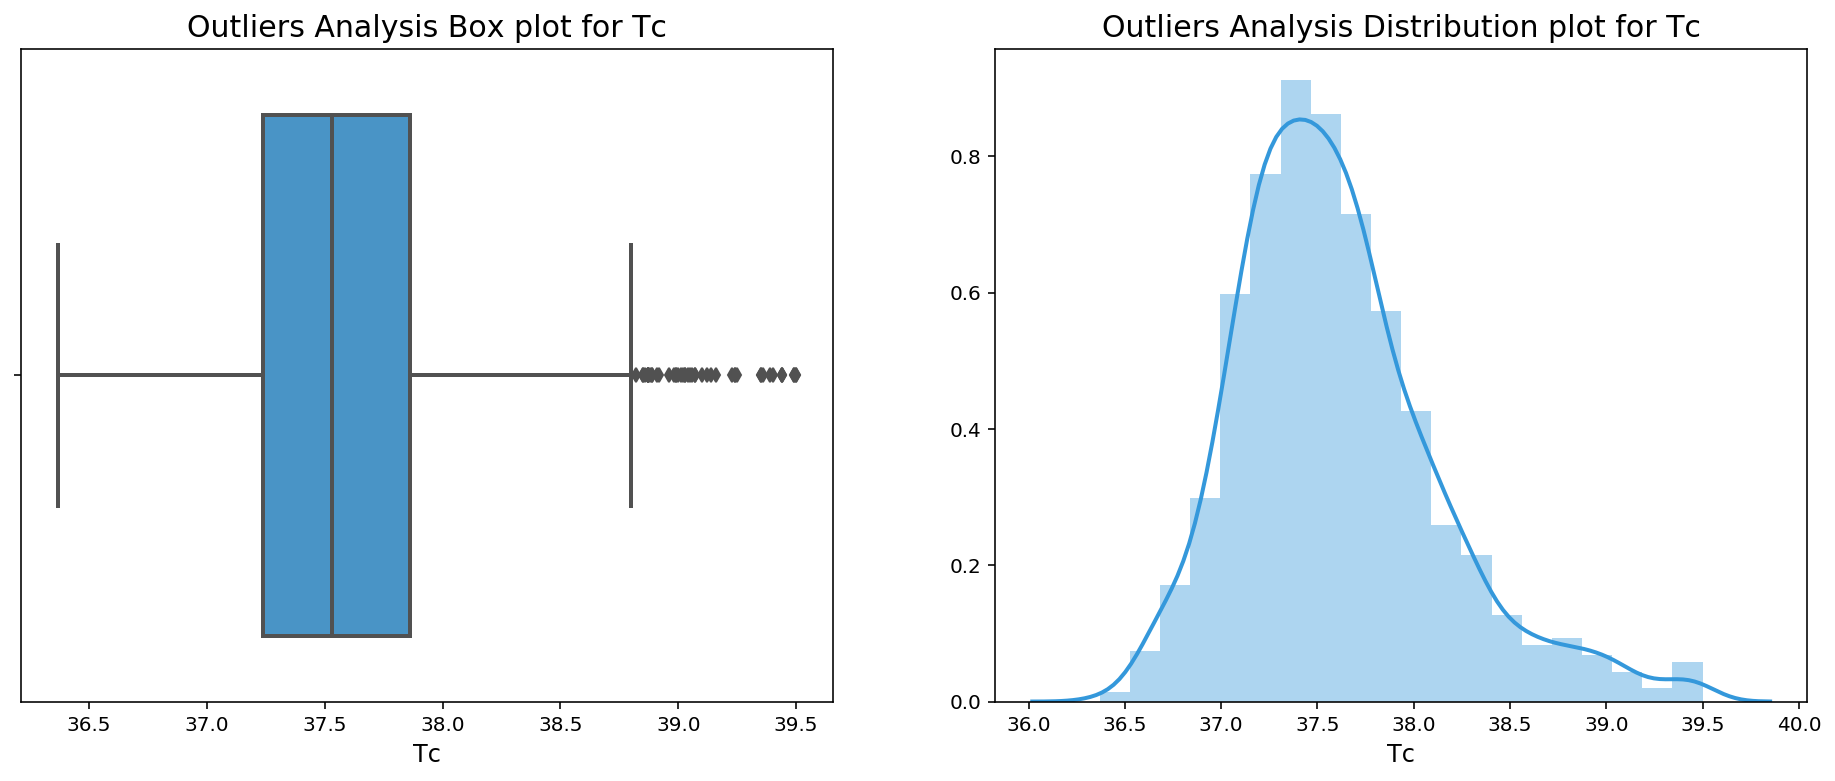

For feature MaxHR. Upper bound : 193.70 Lower Bound: 188.10


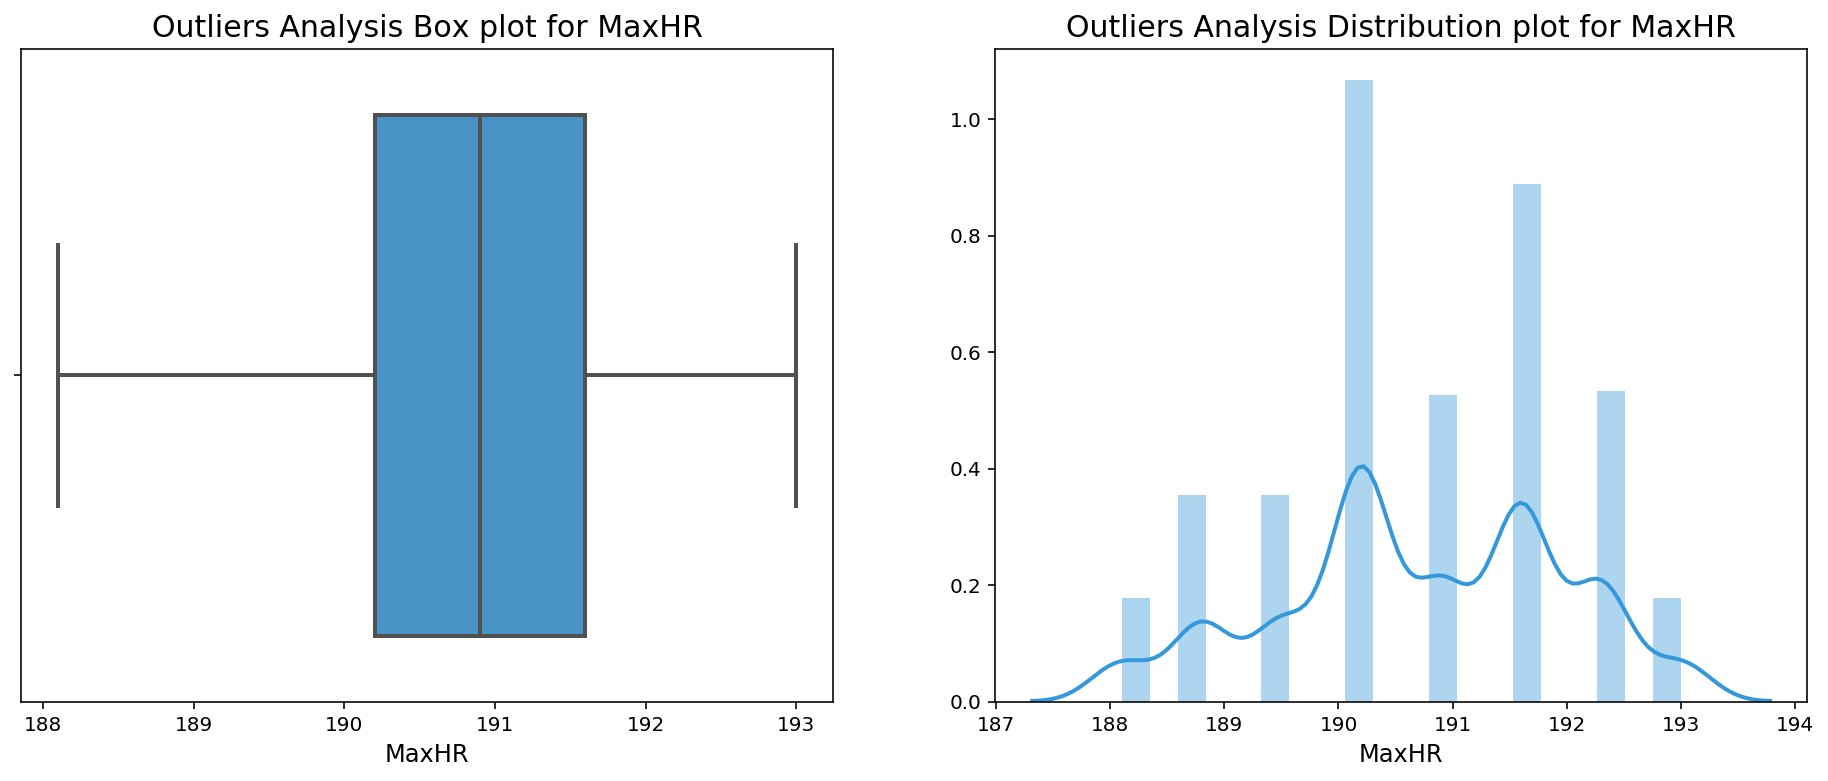

In [7]:
outlier_detection(dataset)

From the above analysis we found that there are some outliers for `HR` and `TC`. We will check below the outliers in the dataset

In [8]:
# Checking the outliers observations for HR
dataset.loc[(dataset['HR']< 72) | (dataset['HR'] >168)]

,SubjectID,Time,HR,Tc,RH,Sex,MaxHR
74,4,85,169.0,38.31,85.0,1,191.6
532,10,0,68.0,36.67,70.0,1,189.5
855,3,0,71.0,37.14,70.0,0,190.2
988,10,0,69.0,36.37,70.0,0,191.6
1022,11,85,169.0,38.60,70.0,0,190.9
1100,3,0,69.0,36.94,85.0,0,190.2
1261,11,45,170.0,38.15,85.0,0,190.9
1262,11,50,171.0,38.33,85.0,0,190.9
1263,11,55,172.0,38.52,85.0,0,190.9
1264,11,60,177.0,38.64,85.0,0,190.9


In [9]:
# Checking the outliers observations for HR
dataset.loc[dataset['Tc'] >38.77]

,SubjectID,Time,HR,Tc,RH,Sex,MaxHR
868,3,65,167.0,38.82,70.0,0,190.2
869,3,70,148.0,38.87,70.0,0,190.2
870,3,75,158.0,38.89,70.0,0,190.2
871,3,80,154.0,38.98,70.0,0,190.2
872,3,85,150.0,39.01,70.0,0,190.2
873,3,90,152.0,39.05,70.0,0,190.2
1079,1,85,150.0,38.87,85.0,0,190.2
1080,1,90,155.0,38.99,85.0,0,190.2
1098,2,85,148.0,38.80,85.0,0,192.3
1099,2,90,148.0,38.92,85.0,0,192.3


## Coding Challenge 2-  

## Would you remove any data or impute any values? If so, why?

In [10]:
# Missing HR values in dataset

dataset[dataset['HR'].isna()]

,SubjectID,Time,HR,Tc,RH,Sex,MaxHR
1117,3,85,NaN,NaN,85.0,0,190.2
1174,6,85,NaN,NaN,85.0,0,191.6
1269,11,85,NaN,NaN,85.0,0,190.9


In [11]:
# Missing TC values in dataset

dataset[dataset['Tc'].isna()]

,SubjectID,Time,HR,Tc,RH,Sex,MaxHR
1117,3,85,NaN,NaN,85.0,0,190.2
1174,6,85,NaN,NaN,85.0,0,191.6
1269,11,85,NaN,NaN,85.0,0,190.9
1306,13,80,144.0,NaN,85.0,0,191.6
1307,13,85,151.0,NaN,85.0,0,191.6


In [12]:
# Missing RC values in dataset
dataset[dataset['RH'].isna()]

,SubjectID,Time,HR,Tc,RH,Sex,MaxHR
571,1,5,100.0,36.84,NaN,0,190.2


- We will impute the values for `HR` and `TC` with the `mean`.
        - As these data is continuous numerical data and hence we are imputing it with the mean.

- We will impute the value for `RH` by the `mode`.
        - As there are only 3 values for this feature, hence I am imputing it with the mode 

In [13]:
# Replacing the missing value in RH with the mode
dataset['RH']=dataset['RH'].fillna(dataset['RH'].mode().iloc[0])

In [14]:
# Replacing the missing value in Tc and HR with the mean
dataset['Tc']=dataset['Tc'].fillna(dataset['Tc'].mean())
dataset['HR']=dataset['HR'].fillna(dataset['HR'].mean())

In [15]:
# Checking th missing values in the dataset
print(" Number of missing values :\n \n{}".format(dataset.isna().sum()))

 Number of missing values :
 
SubjectID    0
Time         0
HR           0
Tc           0
RH           0
Sex          0
MaxHR        0
dtype: int64


## Coding Challenge 3- 

## Are any of the variables correlated? If so, why do you think that they are correlated physiologically- what might this tell you about people's responses to increasing relative humidty?

In [16]:
corr_dataset=dataset.drop(['SubjectID','Sex'],axis=1)
corr_dataset.head()

,Time,HR,Tc,RH,MaxHR
0,0,105.0,36.98,85.0,191.6
1,5,119.0,36.98,85.0,191.6
2,10,136.0,37.09,85.0,191.6
3,15,120.0,37.21,85.0,191.6
4,20,123.0,37.21,85.0,191.6


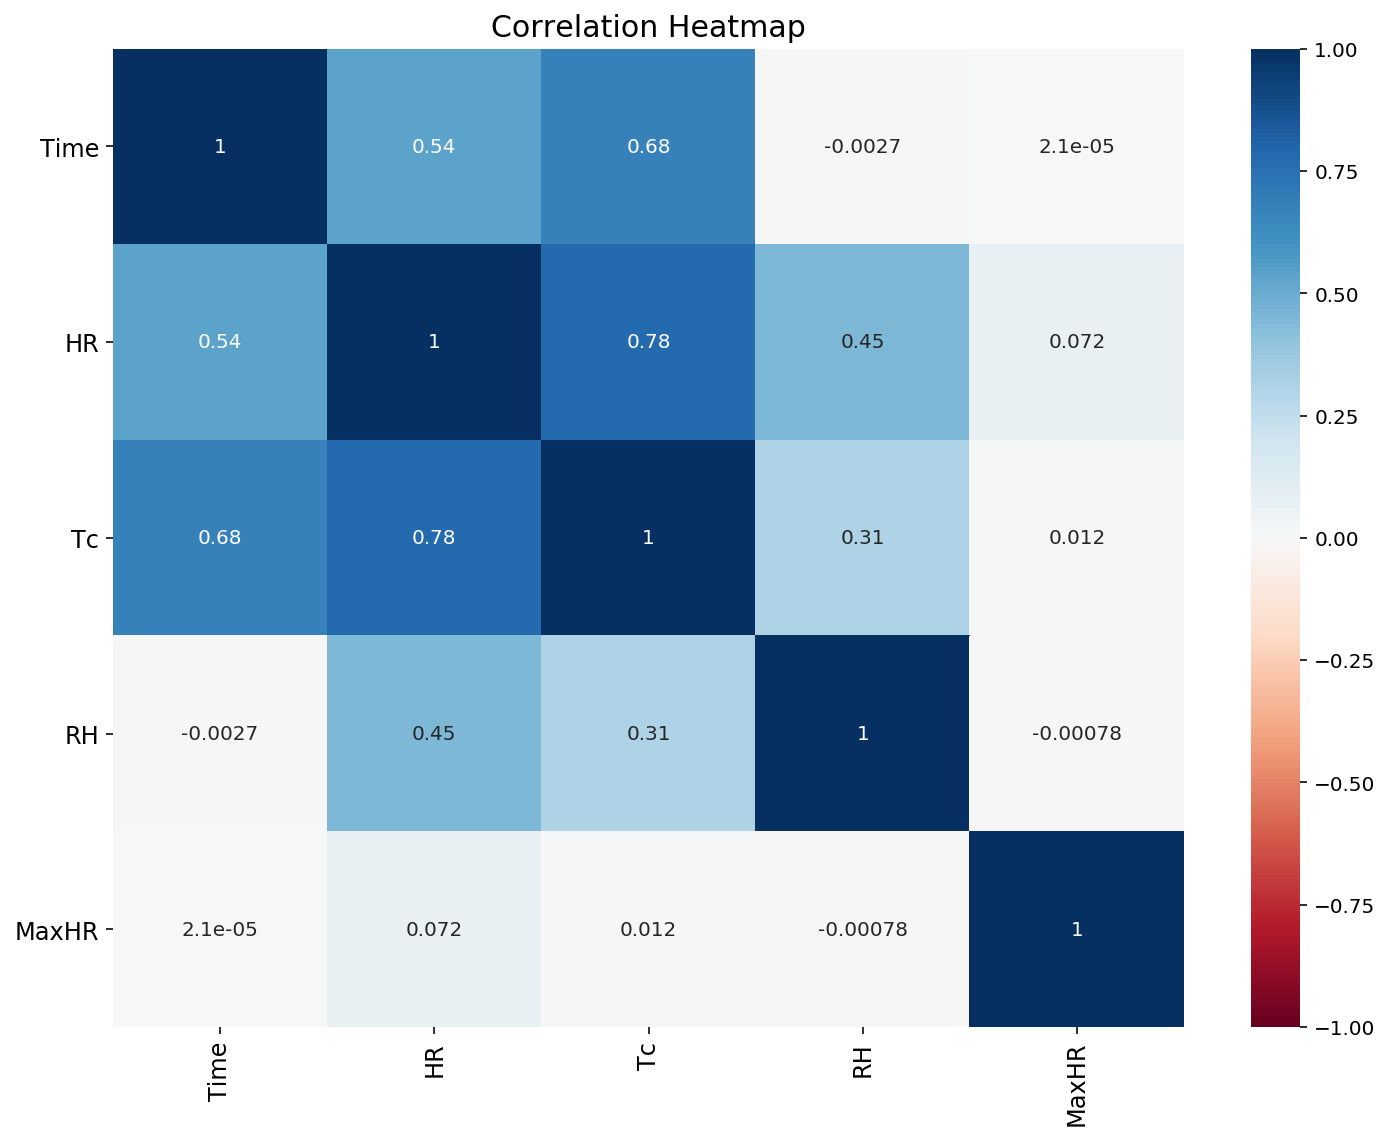

In [17]:
#Plotting the heatmap
plt.figure(figsize = (12, 9))
s = sns.heatmap(corr_dataset.corr(),annot = True, cmap = 'RdBu', vmin = -1,vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap',fontsize=15)
plt.show()

From the above correlation heat map we can see a strong corelation between 

- Time and HR
- Tc and HR
- Tc and Time
- RH and HR (some co-relation but not as strong as rest of them)

We can say that by increasing the relative humidity we can see the increase in the person's heart rate.

## Creating new feature `MaxHR%` and `HR_Zone` 

In [18]:
# Creating new feature MaxHR%

dataset['MaxHR%'] = ((dataset['HR']/dataset['MaxHR'])*100).round(2)

In [19]:
# Creating list of the condition

conditions = [ 
    ( dataset['MaxHR%'] < 60),
    (dataset['MaxHR%'] >= 60 ) & (dataset['MaxHR%'] < 70),
     (dataset['MaxHR%'] >= 70) & (dataset['MaxHR%'] < 80),
     (dataset['MaxHR%'] >= 80) & (dataset['MaxHR%'] < 90),
     (dataset['MaxHR%'] >= 90) & (dataset['MaxHR%'] < 100)]

# Creating values for the conditions
values = ['Zone1','Zone2','Zone3','Zone4','Zone5']

# Creating new features using condition and values

dataset['HR_Zone']= np.select(conditions,values)

In [20]:
dataset.head()

,SubjectID,Time,HR,Tc,RH,Sex,MaxHR,MaxHR%,HR_Zone
0,1,0,105.0,36.98,85.0,1,191.6,54.80,Zone1
1,1,5,119.0,36.98,85.0,1,191.6,62.11,Zone2
2,1,10,136.0,37.09,85.0,1,191.6,70.98,Zone3
3,1,15,120.0,37.21,85.0,1,191.6,62.63,Zone2
4,1,20,123.0,37.21,85.0,1,191.6,64.20,Zone2


## Coding Challenge 5-

## Are there are differences between males & females? If so, what are they? What do they mean within the context of this study, physiologically? (Feel free to run any statistical analyses here if you feel they are appropriate).

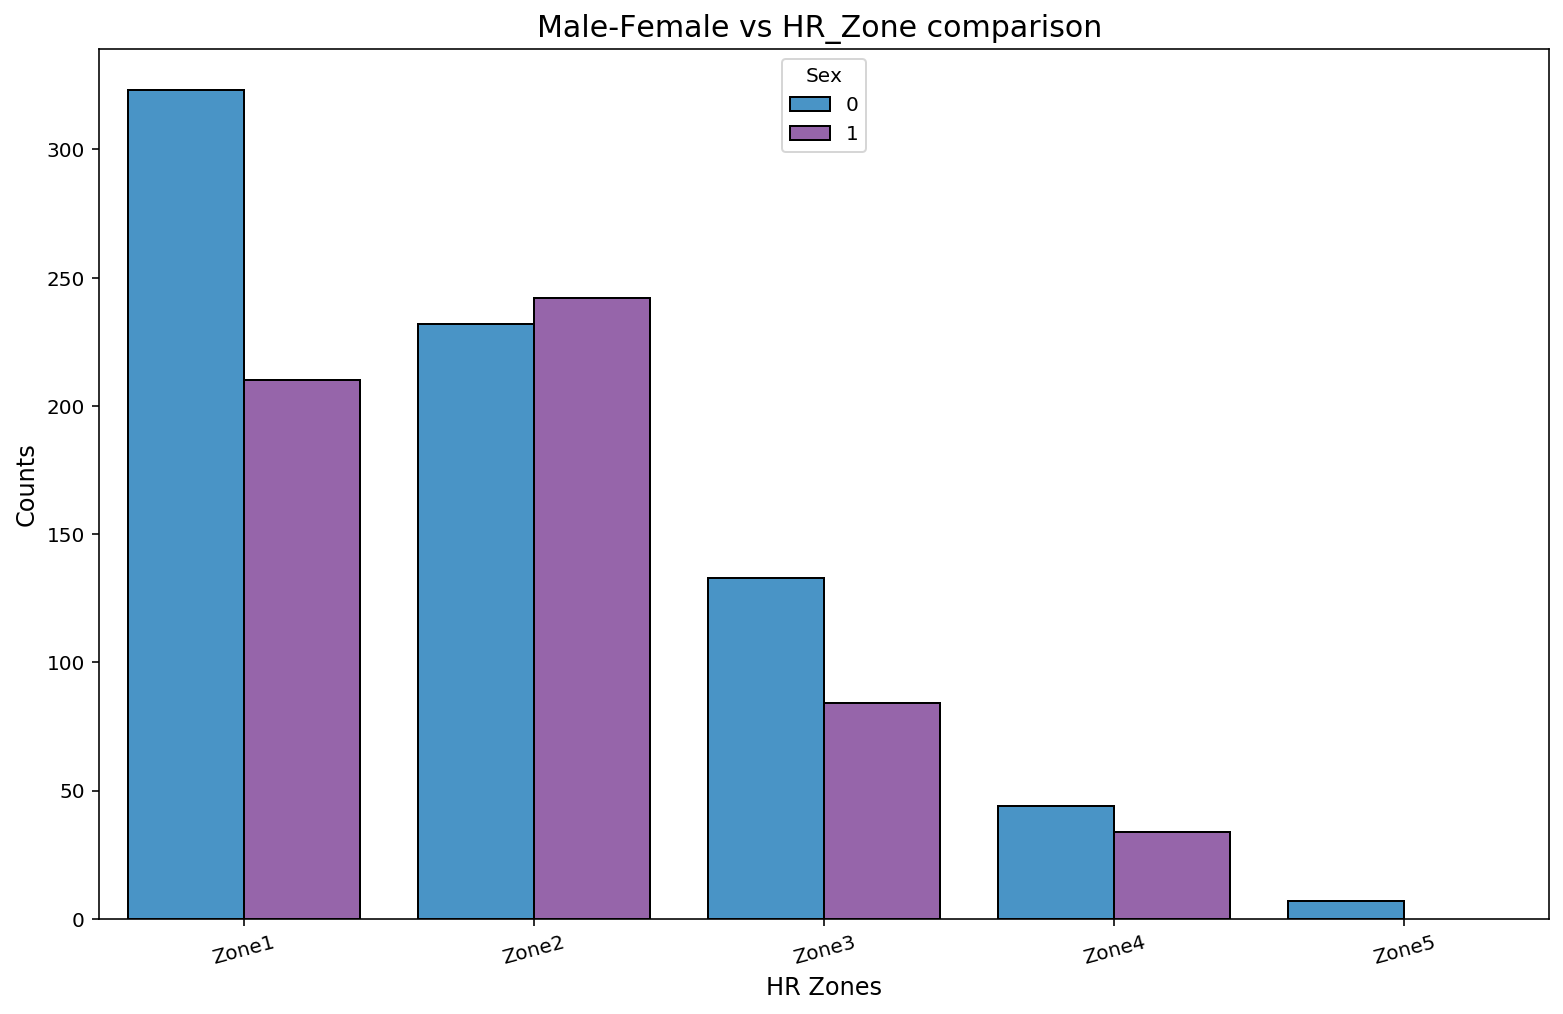

In [21]:
#fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(data=dataset,x='HR_Zone',hue='Sex',edgecolor = "black")
plt.xlabel('HR Zones', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Male-Female vs HR_Zone comparison ", fontsize=15)
plt.xticks(rotation=15);

Few takeaway from the above plot shows are :

    - The count of female in Zone 2 is more than Male
    - There are no females in Zone 5
    - Most of our observation lies in Zone 1 and Zone 2 

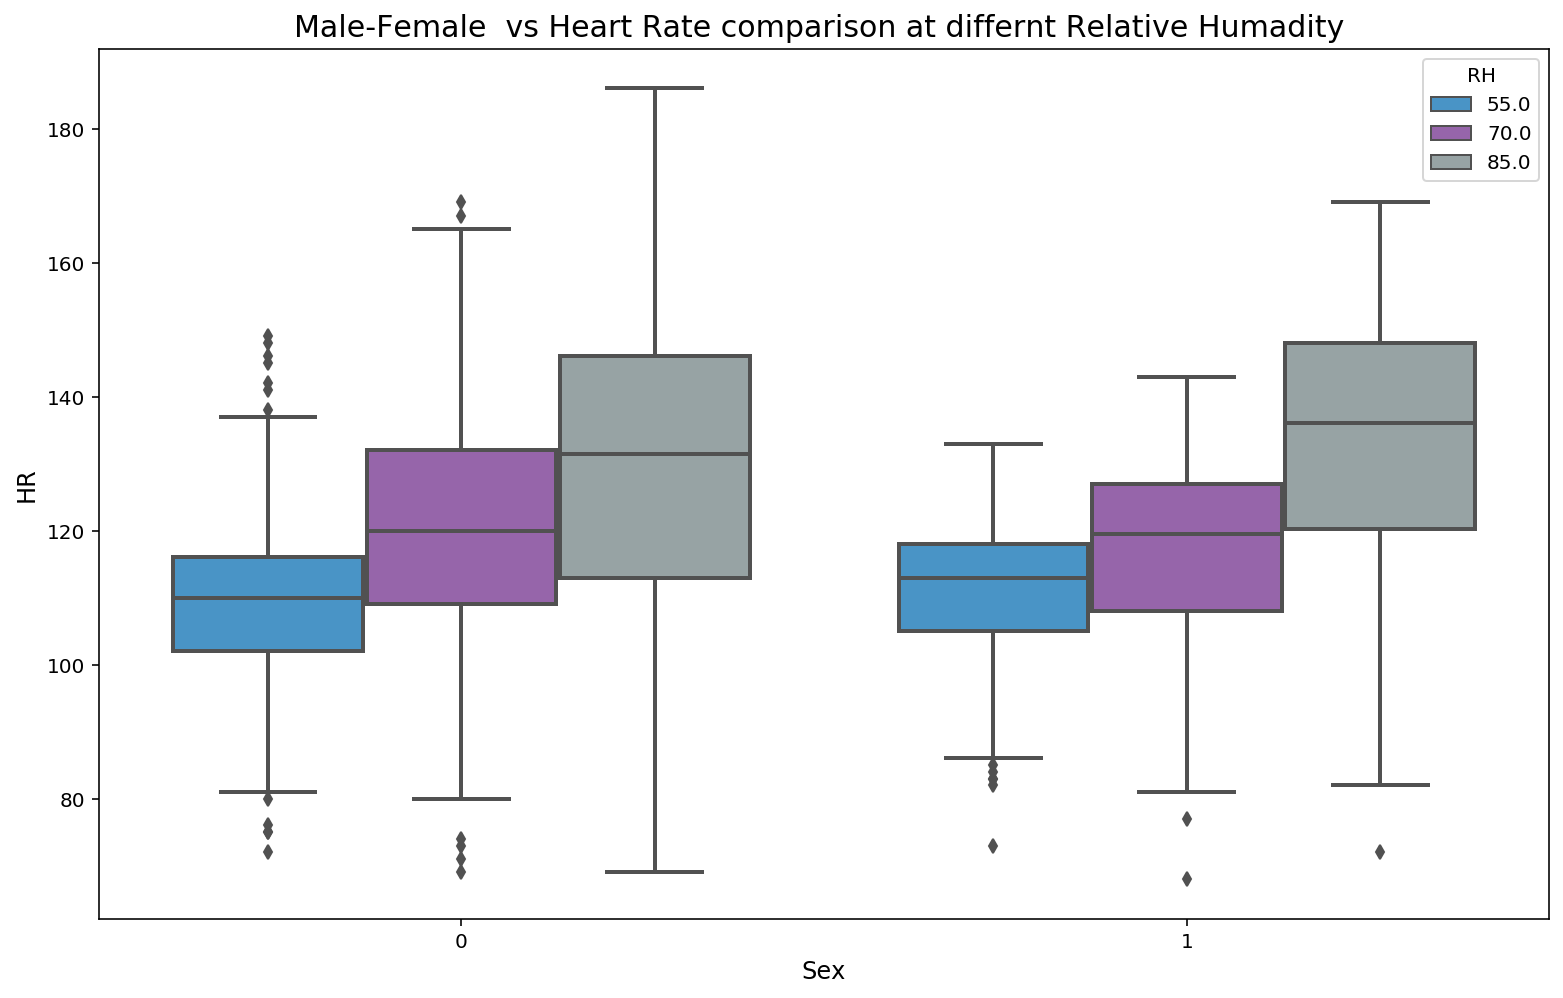

In [22]:
sns.boxplot(data=dataset,x='Sex',y='HR',hue='RH');
plt.xlabel('Sex', fontsize=12)
plt.ylabel('HR', fontsize=12)
plt.title("Male-Female  vs Heart Rate comparison at differnt Relative Humadity ", fontsize=15);

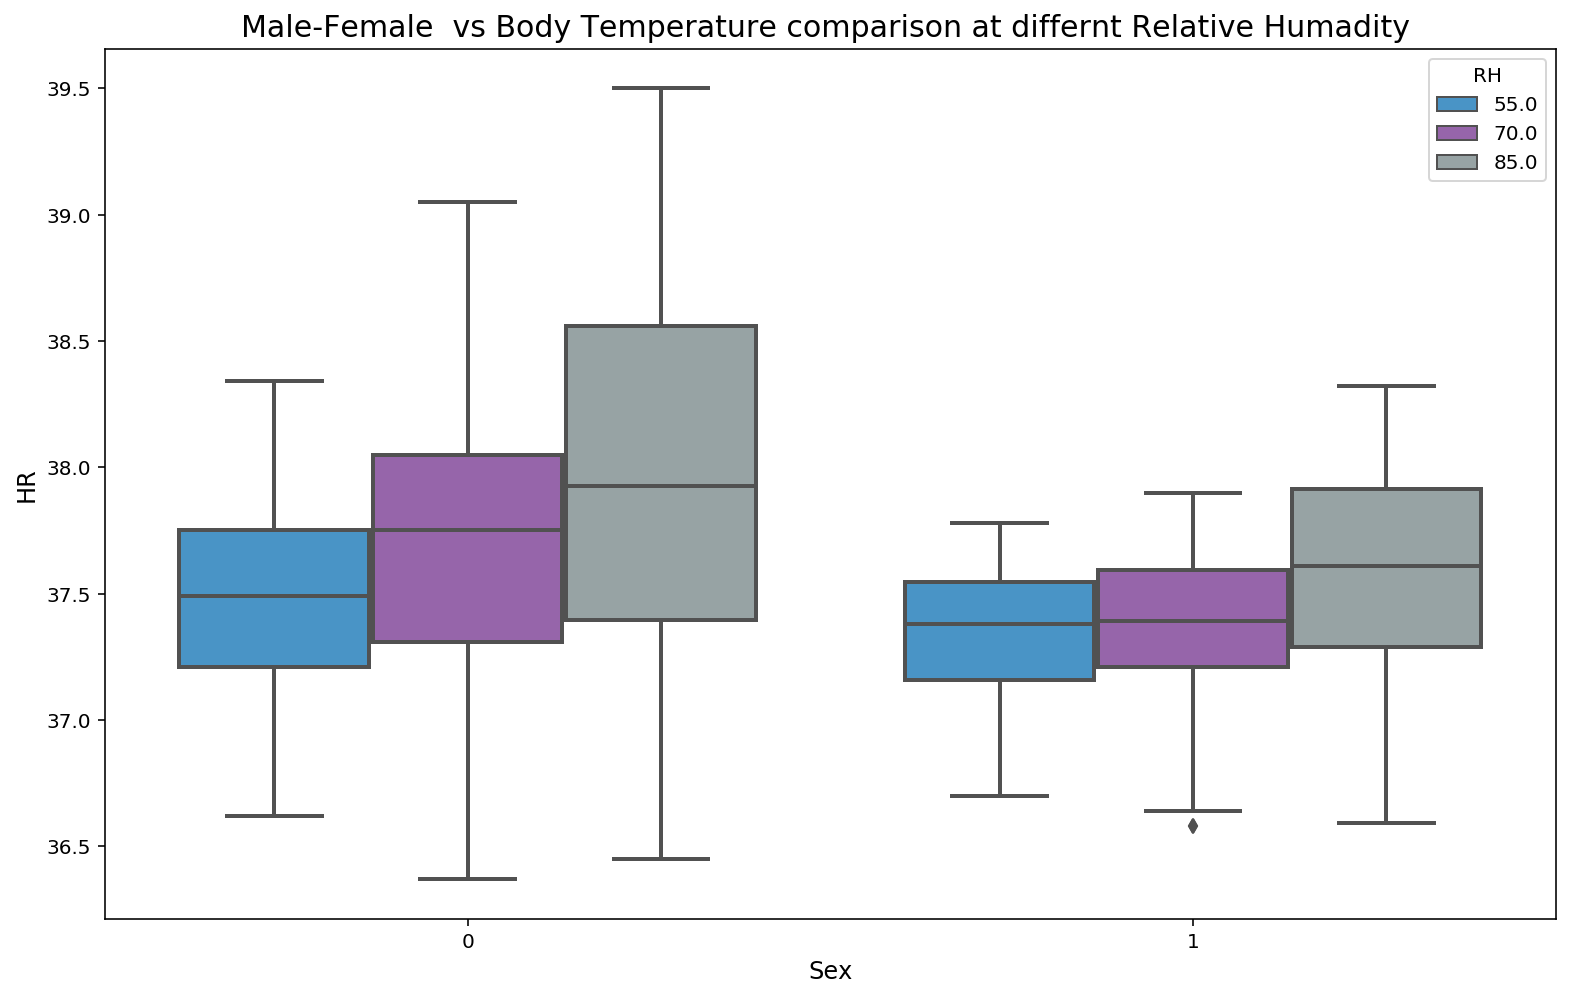

In [23]:
sns.boxplot(data=dataset,x='Sex',y='Tc',hue='RH');
plt.xlabel('Sex', fontsize=12)
plt.ylabel('HR', fontsize=12)
plt.title("Male-Female  vs Body Temperature comparison at differnt Relative Humadity ", fontsize=15);

## Coding Challenge 6-  

## The MaxHR (maximum heart rate) is calculated for each subject, and it is based on their age-predicted max HR. For each HR value (HR column), calculate that person's percent of their max HR. This is a rough estimate of how hard they are working. What can you infer about the work rate or intensity/effort in this study?

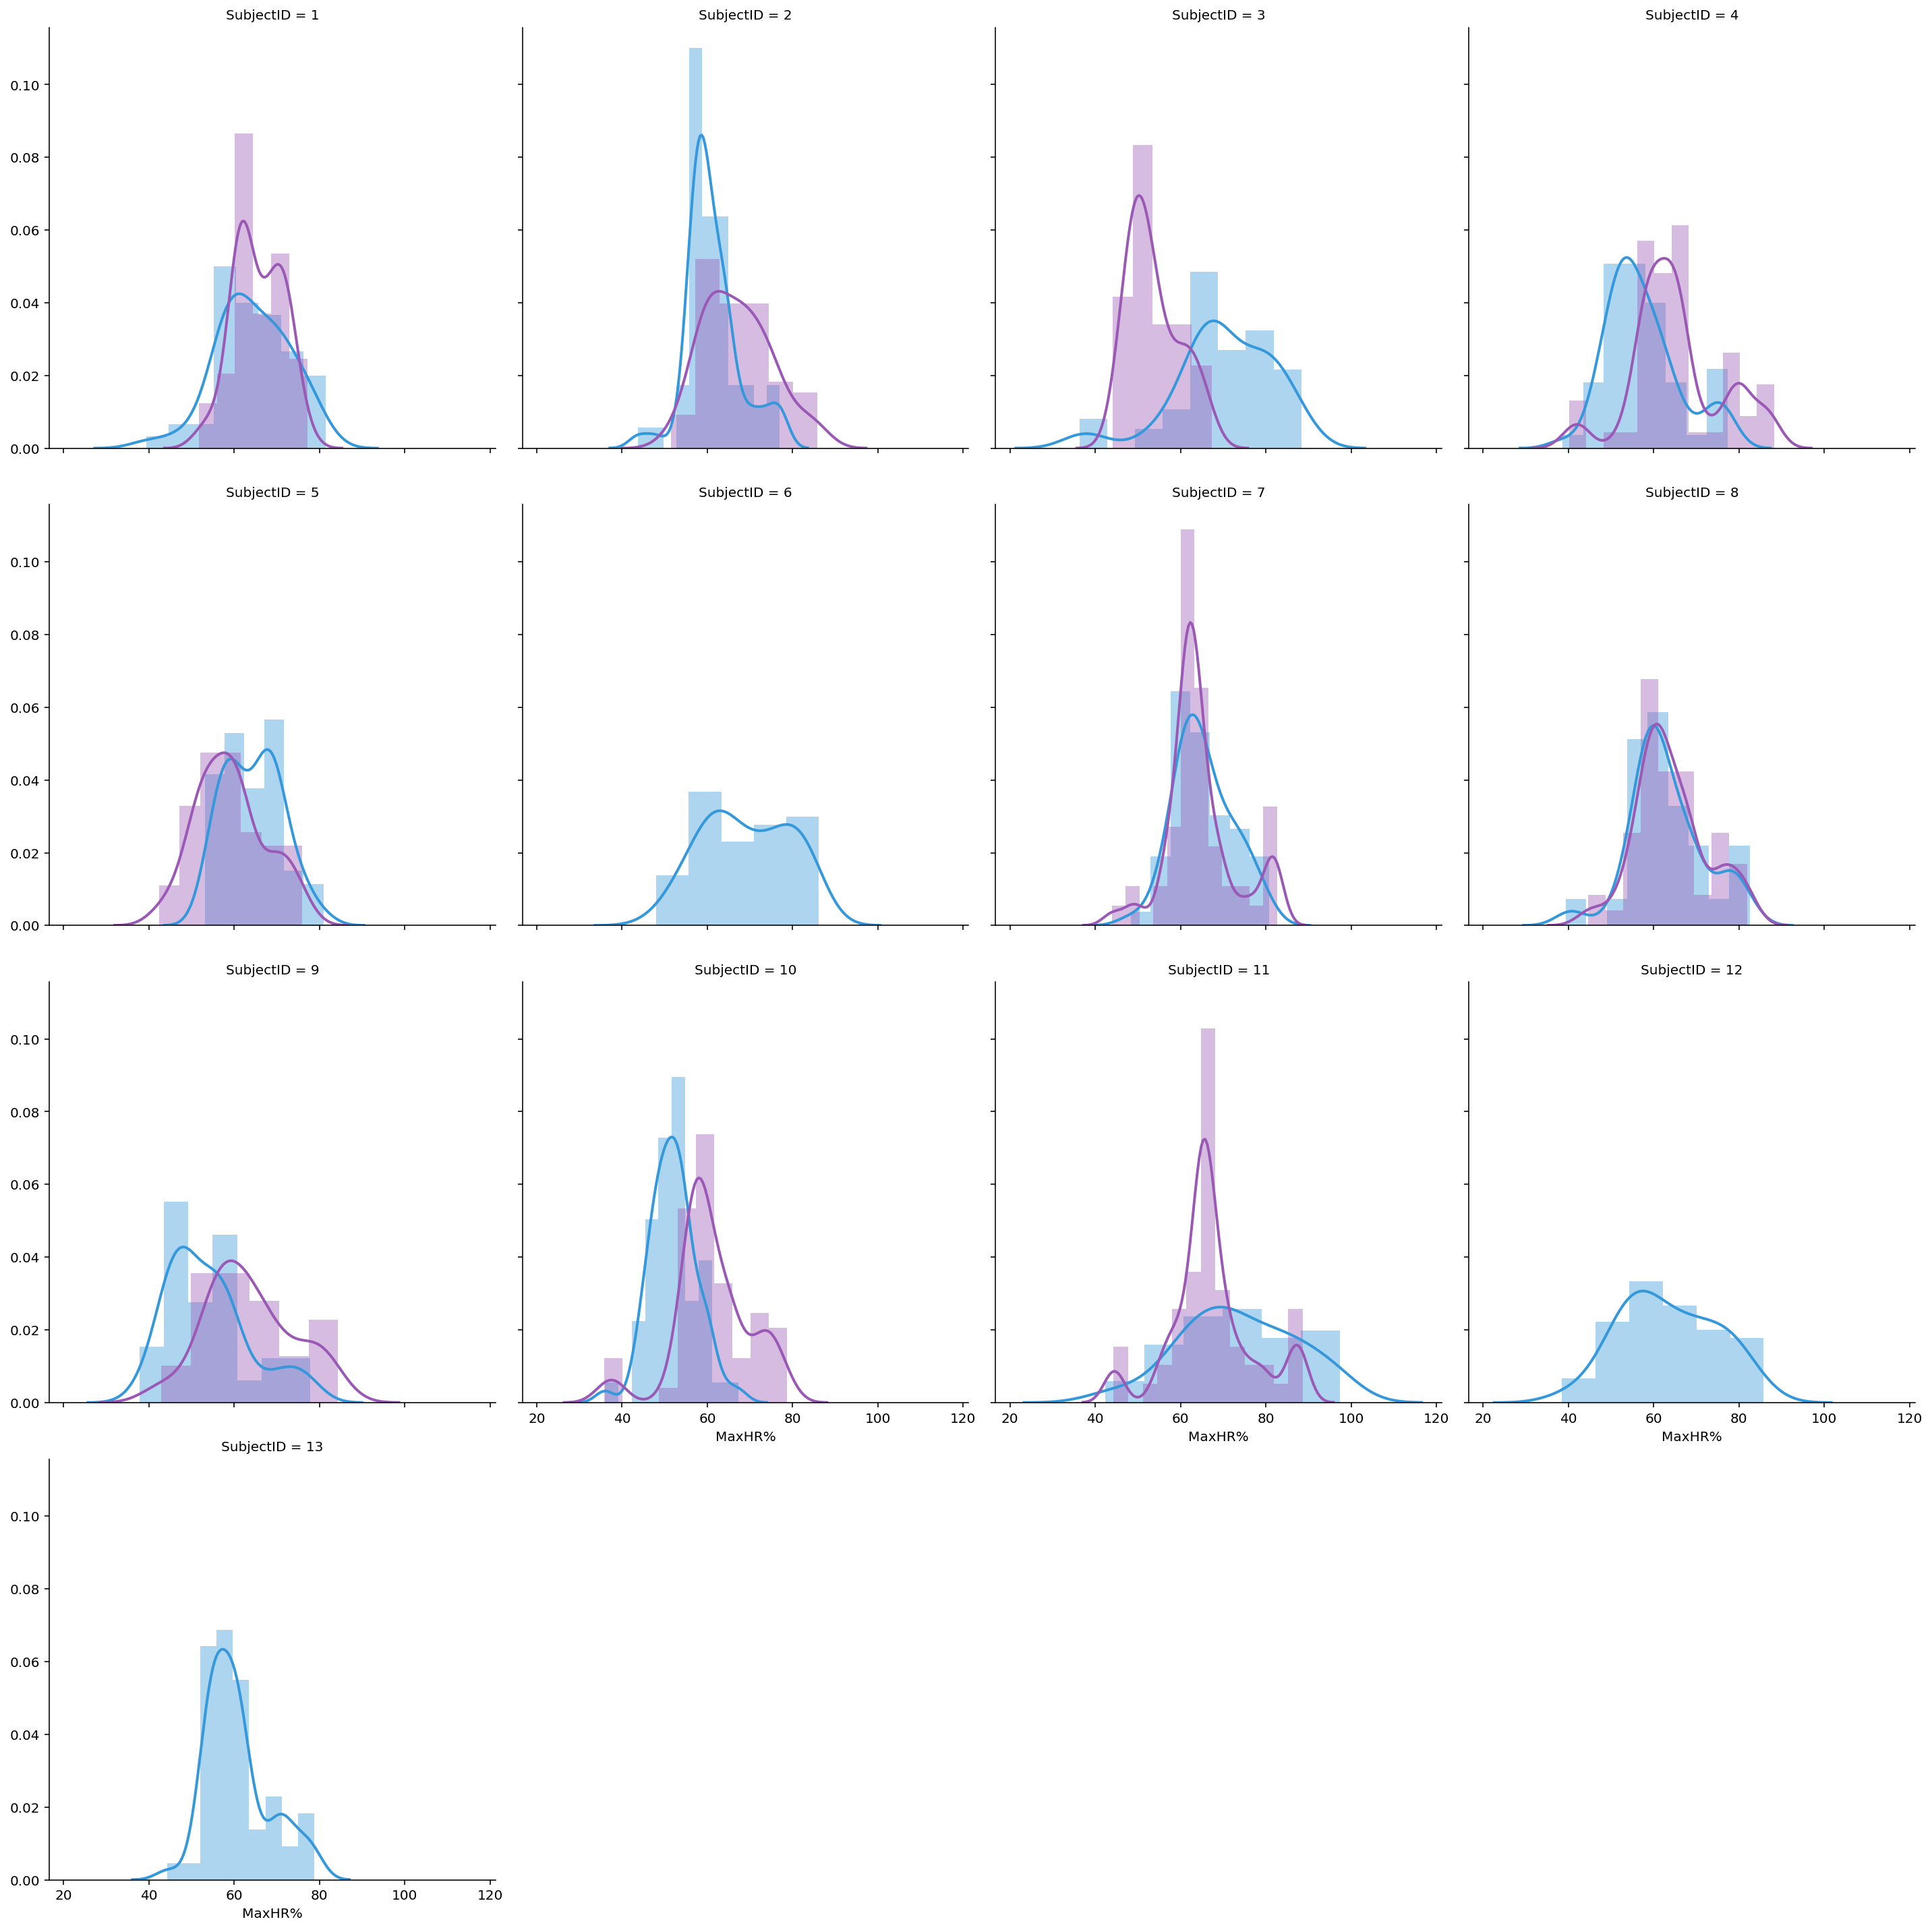

In [24]:
# This plot show the distribution of MaxHR for the Subjects

g = sns.FacetGrid(dataset,col='SubjectID',hue="Sex",col_wrap=4,height=5)
g.map(sns.distplot,"MaxHR%");

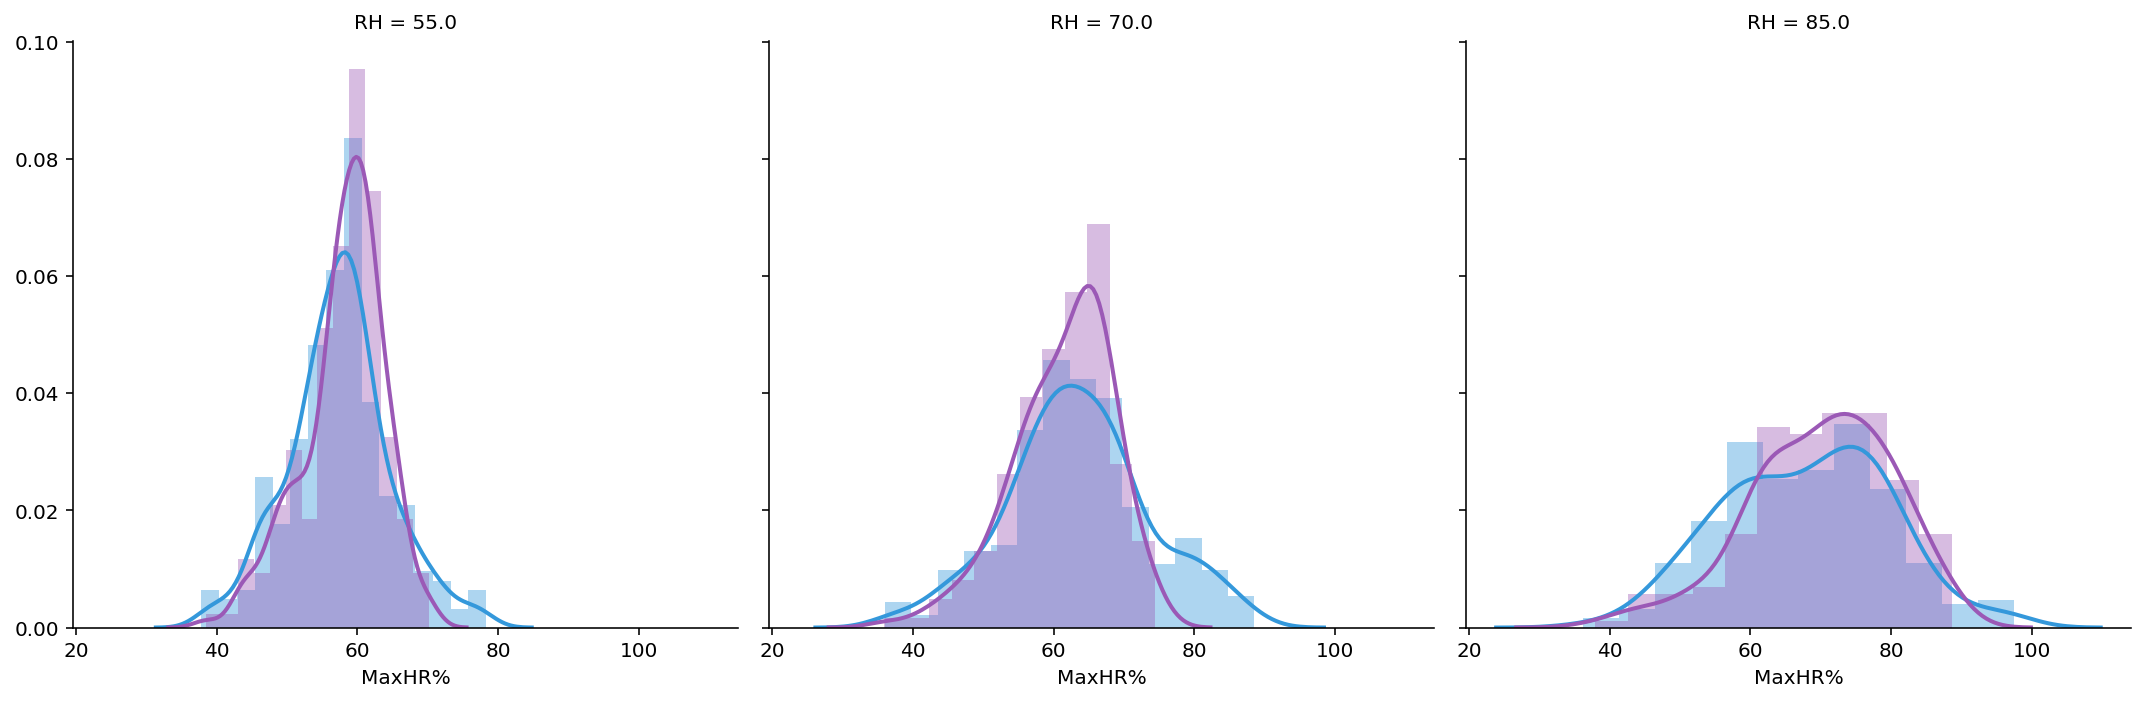

In [25]:
# This plot show the distribution of the MaxHR% at different relative humidity

g = sns.FacetGrid(dataset,col='RH',hue="Sex",col_wrap=3,height=5)
g.map(sns.distplot,"MaxHR%");

From the above distirubtion we can see how RH humidity is affecting the MaxHR%, as RH is increasing MaxHR% is also increasing

## Coding Challenge 7 -  

## Are there differences between subjects' HR zones? What about differences across RH (relative humidity) or Time- the independent variables in this study?

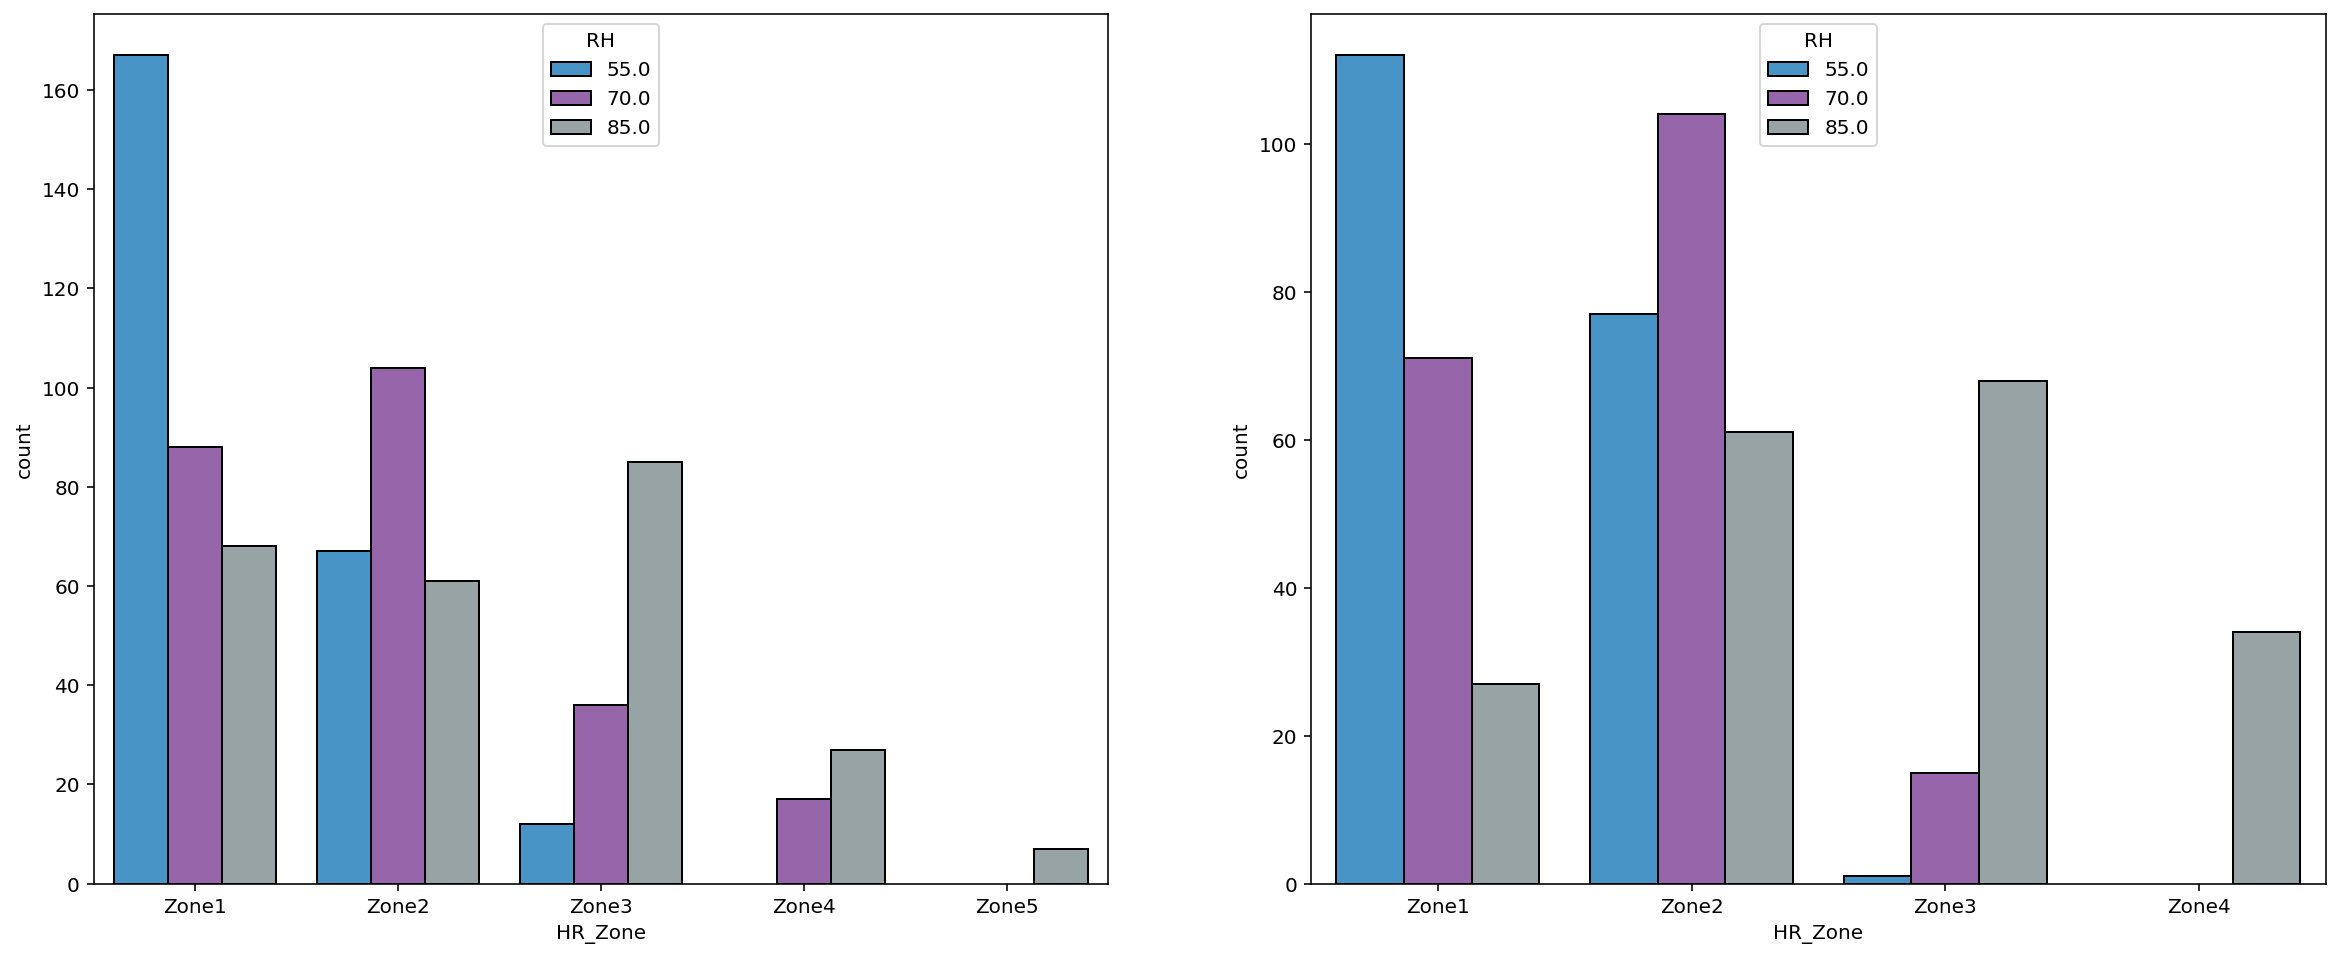

In [26]:
# This plot show difference in the HR Zones at different RH

plt.figure(figsize=(20,8))

#Plot for Male
plt.subplot(1,2,1)
sns.countplot(data=dataset[dataset['Sex']==0],x='HR_Zone',hue='RH',edgecolor = "black");

#Plot for Female
plt.subplot(1,2,2)
sns.countplot(data=dataset[dataset['Sex']==1],x='HR_Zone',hue='RH',edgecolor = "black");

## Coding Challenge 8 - 

## How many times did someone exceed 38.2C?

In [27]:
# Filetering the dataset where Tc > 38.2
high_Tc= dataset[dataset['Tc']>38.2]
high_Tc

,SubjectID,Time,HR,Tc,RH,Sex,MaxHR,MaxHR%,HR_Zone
73,4,80,165.0,38.22,85.0,1,191.6,86.12,Zone4
74,4,85,169.0,38.31,85.0,1,191.6,88.20,Zone4
75,4,90,166.0,38.30,85.0,1,191.6,86.64,Zone4
110,7,75,153.0,38.23,85.0,1,188.8,81.04,Zone4
111,7,80,153.0,38.29,85.0,1,188.8,81.04,Zone4
...,...,...,...,...,...,...,...,...,...
1302,13,60,147.0,39.06,85.0,0,191.6,76.72,Zone3
1303,13,65,135.0,39.24,85.0,0,191.6,70.46,Zone3
1304,13,70,139.0,39.35,85.0,0,191.6,72.55,Zone3
1305,13,75,143.0,39.44,85.0,0,191.6,74.63,Zone3


The are total **157** observation when the temperature crosses 38.2

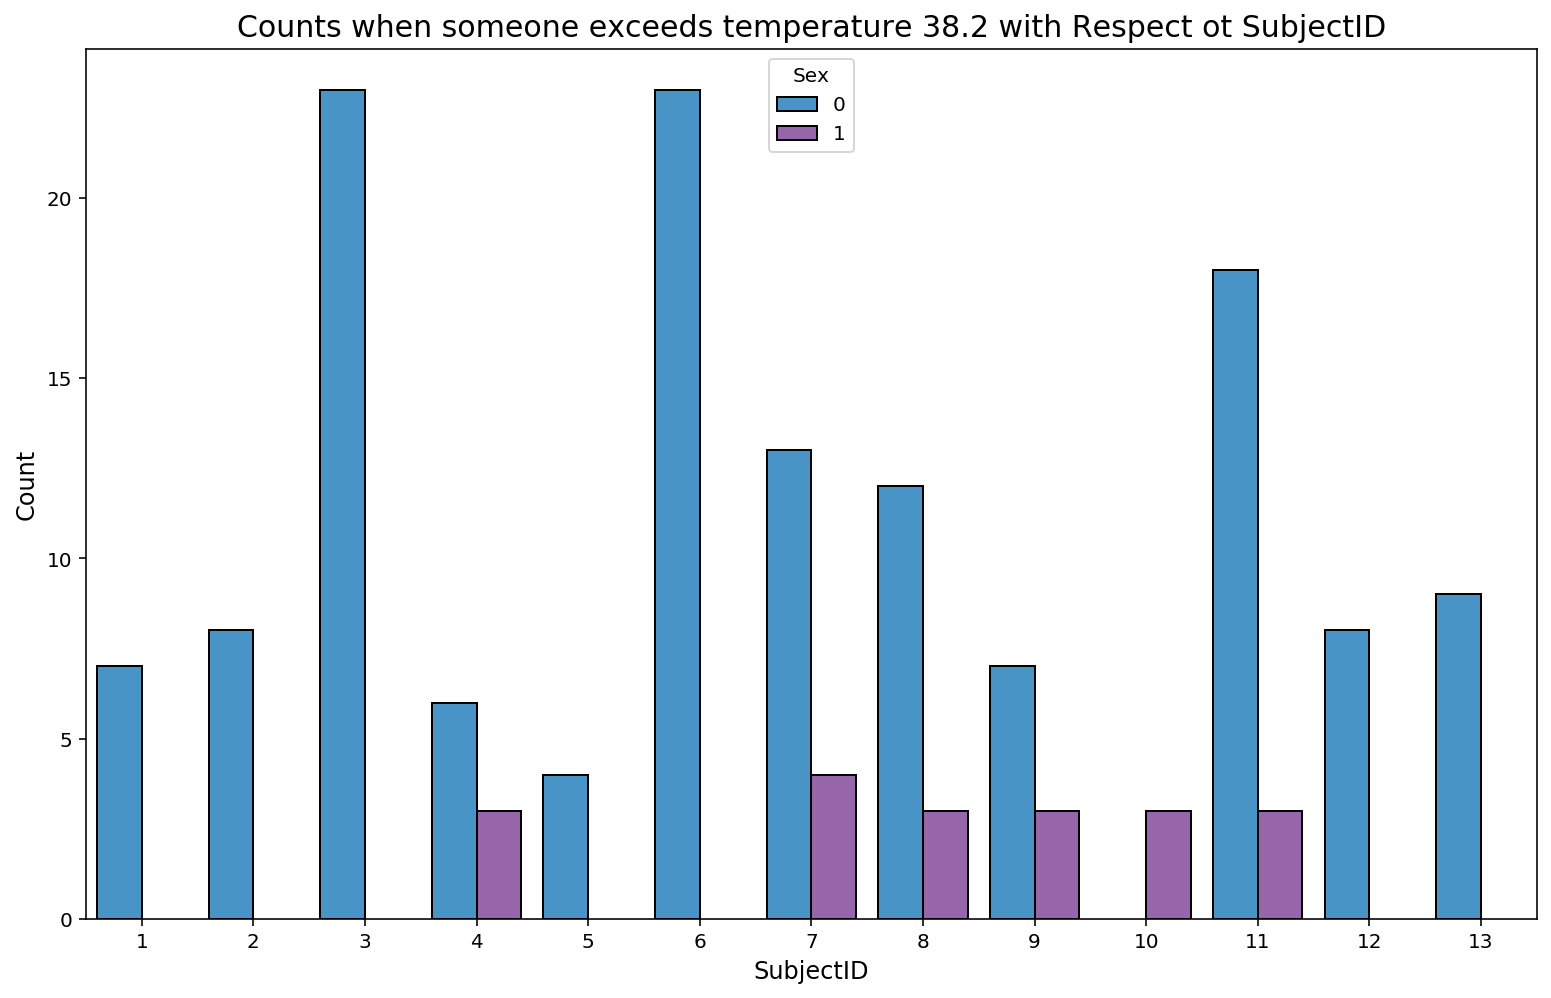

In [28]:
# Plotting the counts of Male and Female exceeding the Tc>38.2 with respect of SubjectID

high_tc_group=high_Tc.groupby(['SubjectID','Sex'])[['Tc']].count()
high_tc_group.reset_index()
sns.barplot(x='SubjectID',y='Tc',data=high_tc_group.reset_index(),edgecolor = "black",hue='Sex')
plt.xlabel('SubjectID', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Counts when someone exceeds temperature 38.2 with Respect ot SubjectID", fontsize=15);

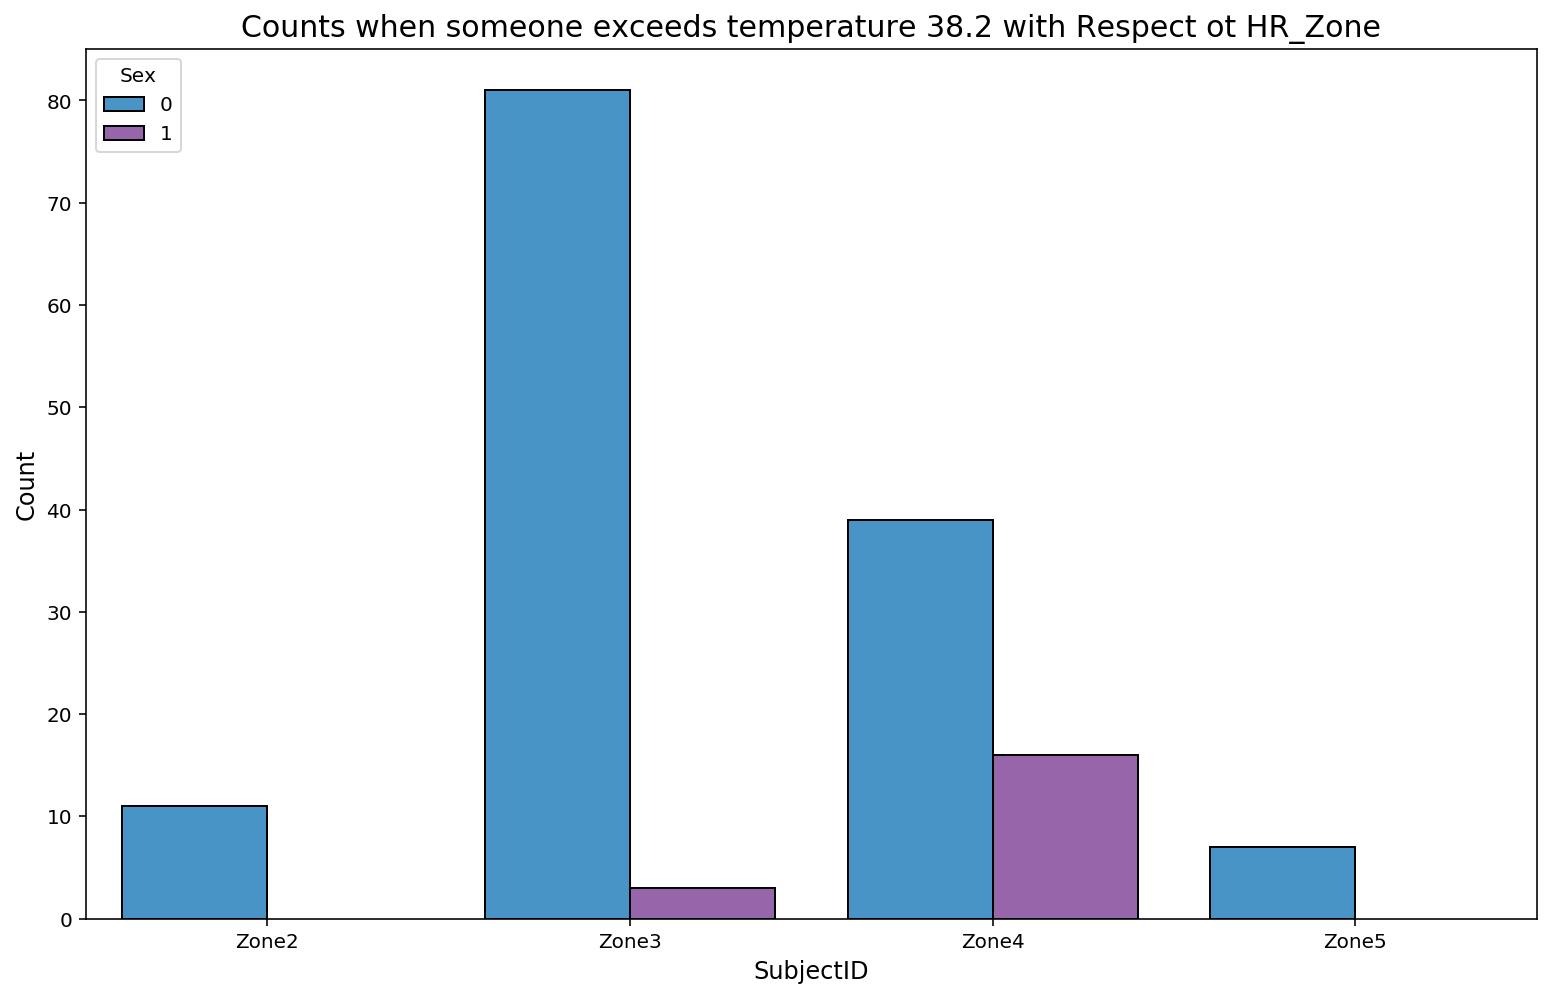

In [29]:
high_tc_group=high_Tc.groupby(['HR_Zone','Sex'])[['Tc']].count()
high_tc_group.reset_index()
sns.barplot(x='HR_Zone',y='Tc',data=high_tc_group.reset_index(),edgecolor = "black",hue='Sex')
plt.xlabel('SubjectID', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Counts when someone exceeds temperature 38.2 with Respect ot HR_Zone", fontsize=15);

## Coding Challenge 9 - 

## What other things can you tell me about the environmental conditions or their physiological responses at that time point?

In [30]:
high_Tc.groupby(['RH','Sex'])['Tc'].agg([min,max])

min    max
RH   Sex              
55.0 0    38.22  38.34
70.0 0    38.21  39.05
85.0 0    38.22  39.50
     1    38.22  38.32

In [31]:
high_Tc.groupby(['RH','Sex'])['Time'].agg([min,max])

min  max
RH   Sex          
55.0 0     75   90
70.0 0     30   90
85.0 0     40   90
     1     75   90

In [32]:
high_Tc.groupby(['RH','Sex'])['MaxHR%'].agg([min,max])

min    max
RH   Sex              
55.0 0    68.87  78.34
70.0 0    66.25  88.53
85.0 0    66.81  97.43
     1    71.77  88.65

## Coding Challenge 10 - 

## Create a figure where you can best see how core temperature changes over time in men vs. women, but also at the 3 different relative humidities. What insights can be gained from this graph?

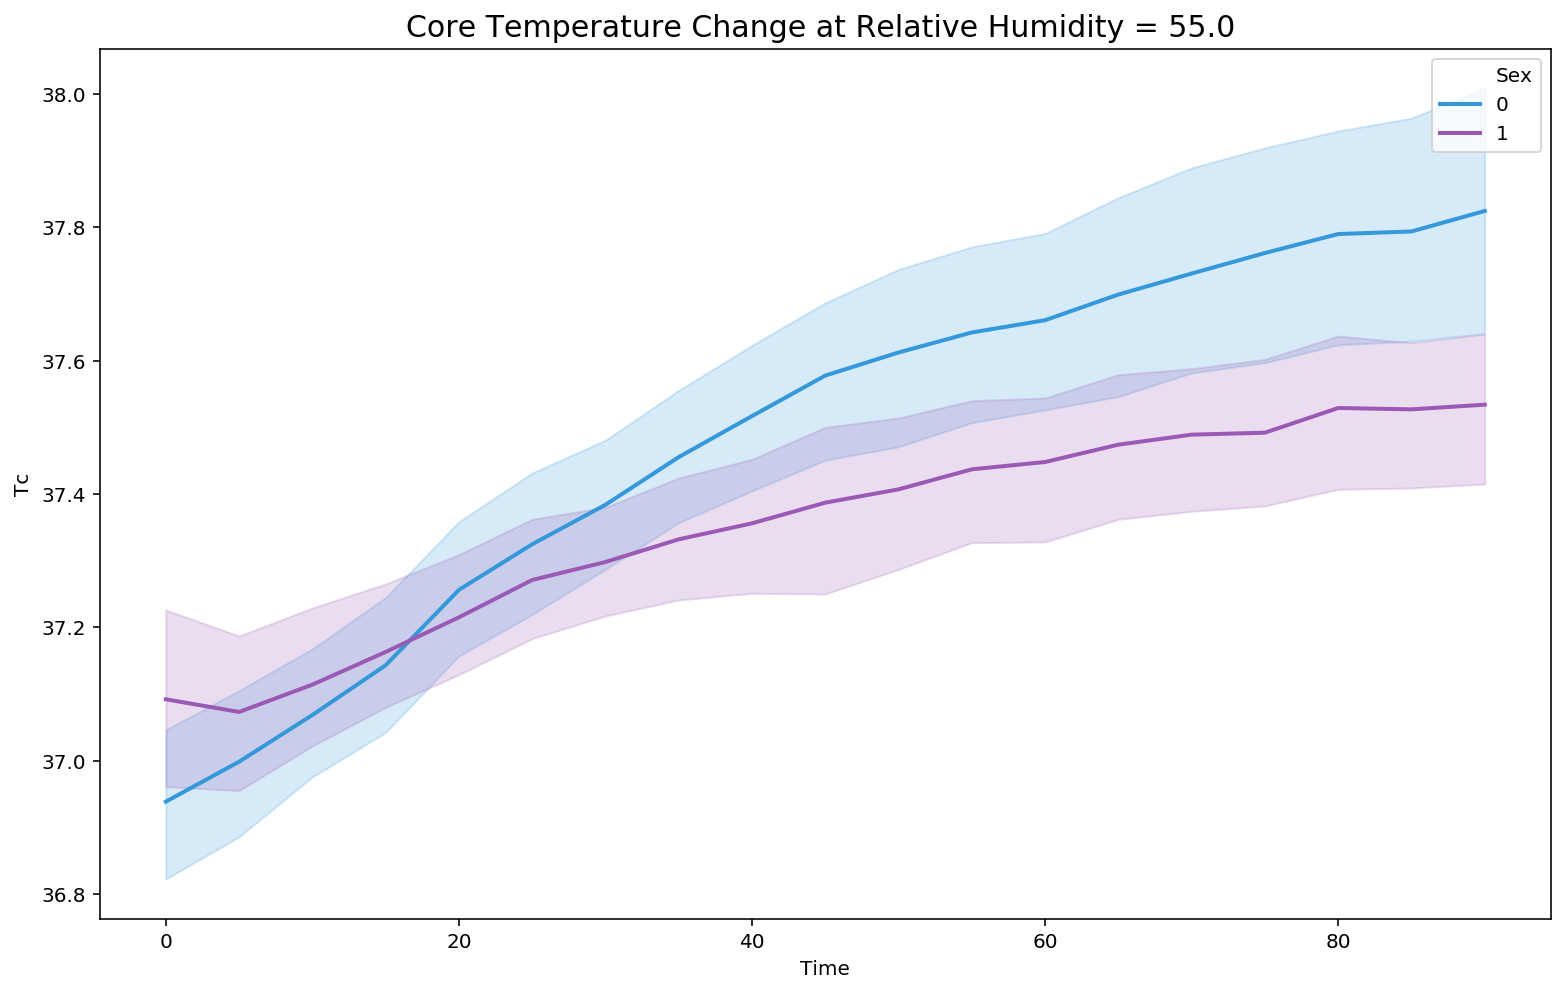

In [33]:
#fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(data=dataset[dataset['RH']==55.0],y='Tc',x= 'Time',hue='Sex')
plt.title("Core Temperature Change at Relative Humidity = 55.0 ", fontsize=15);

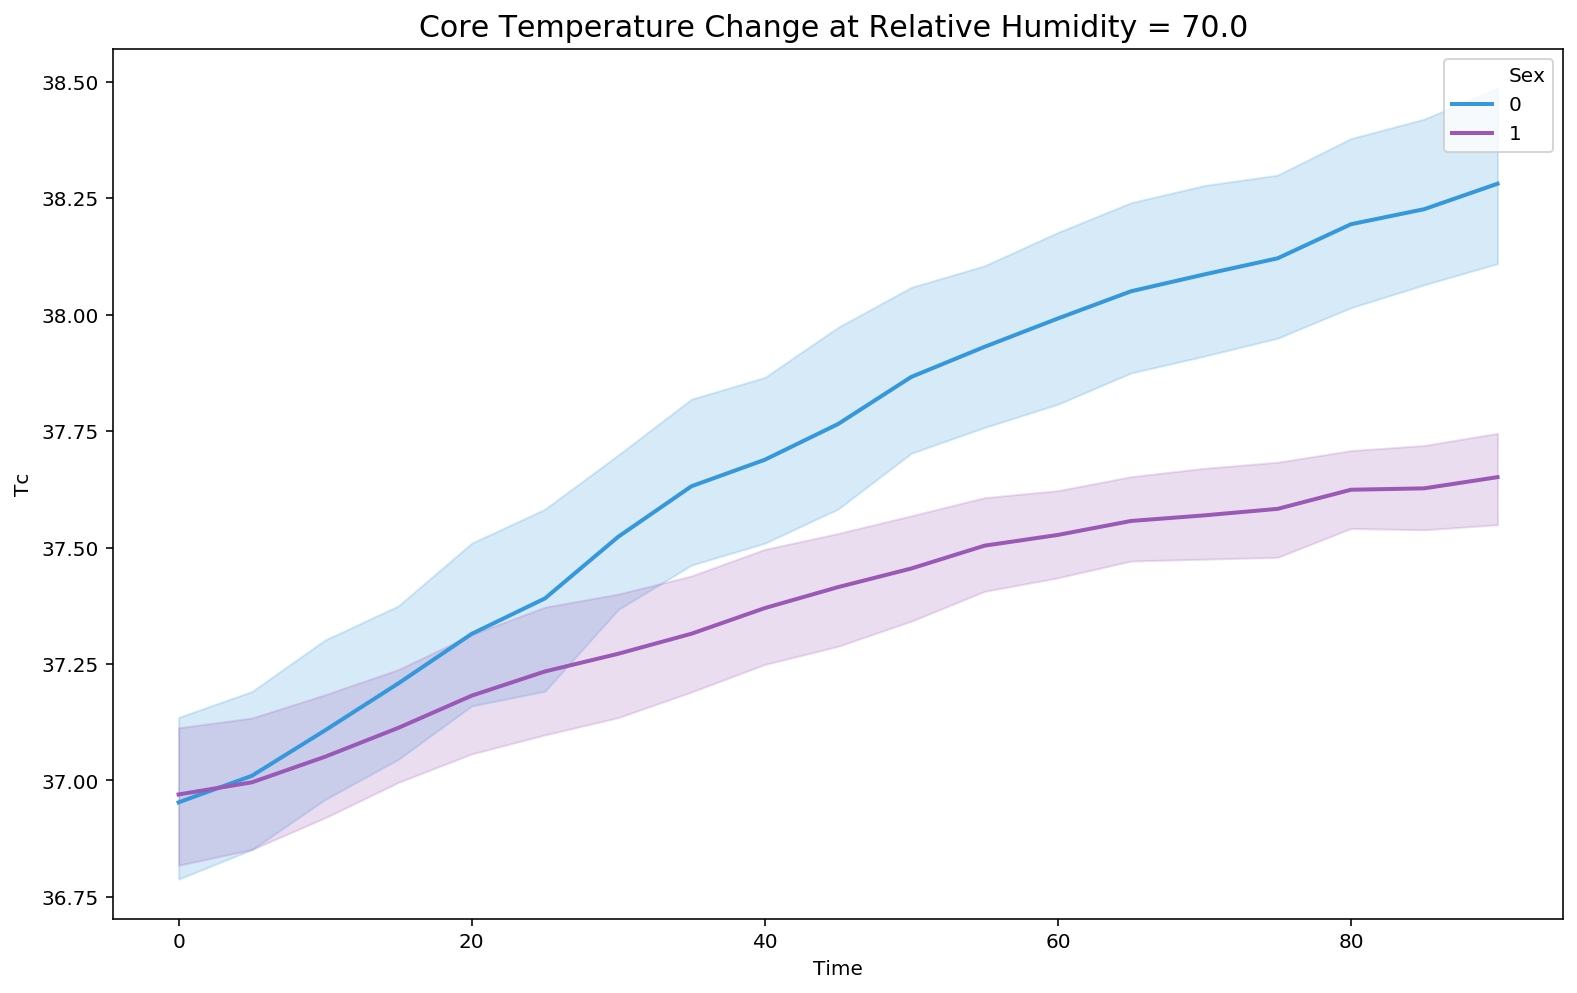

In [34]:
sns.lineplot(data=dataset[dataset['RH']==70.0],y='Tc',x= 'Time',hue='Sex')
plt.title("Core Temperature Change at Relative Humidity = 70.0 ", fontsize=15);

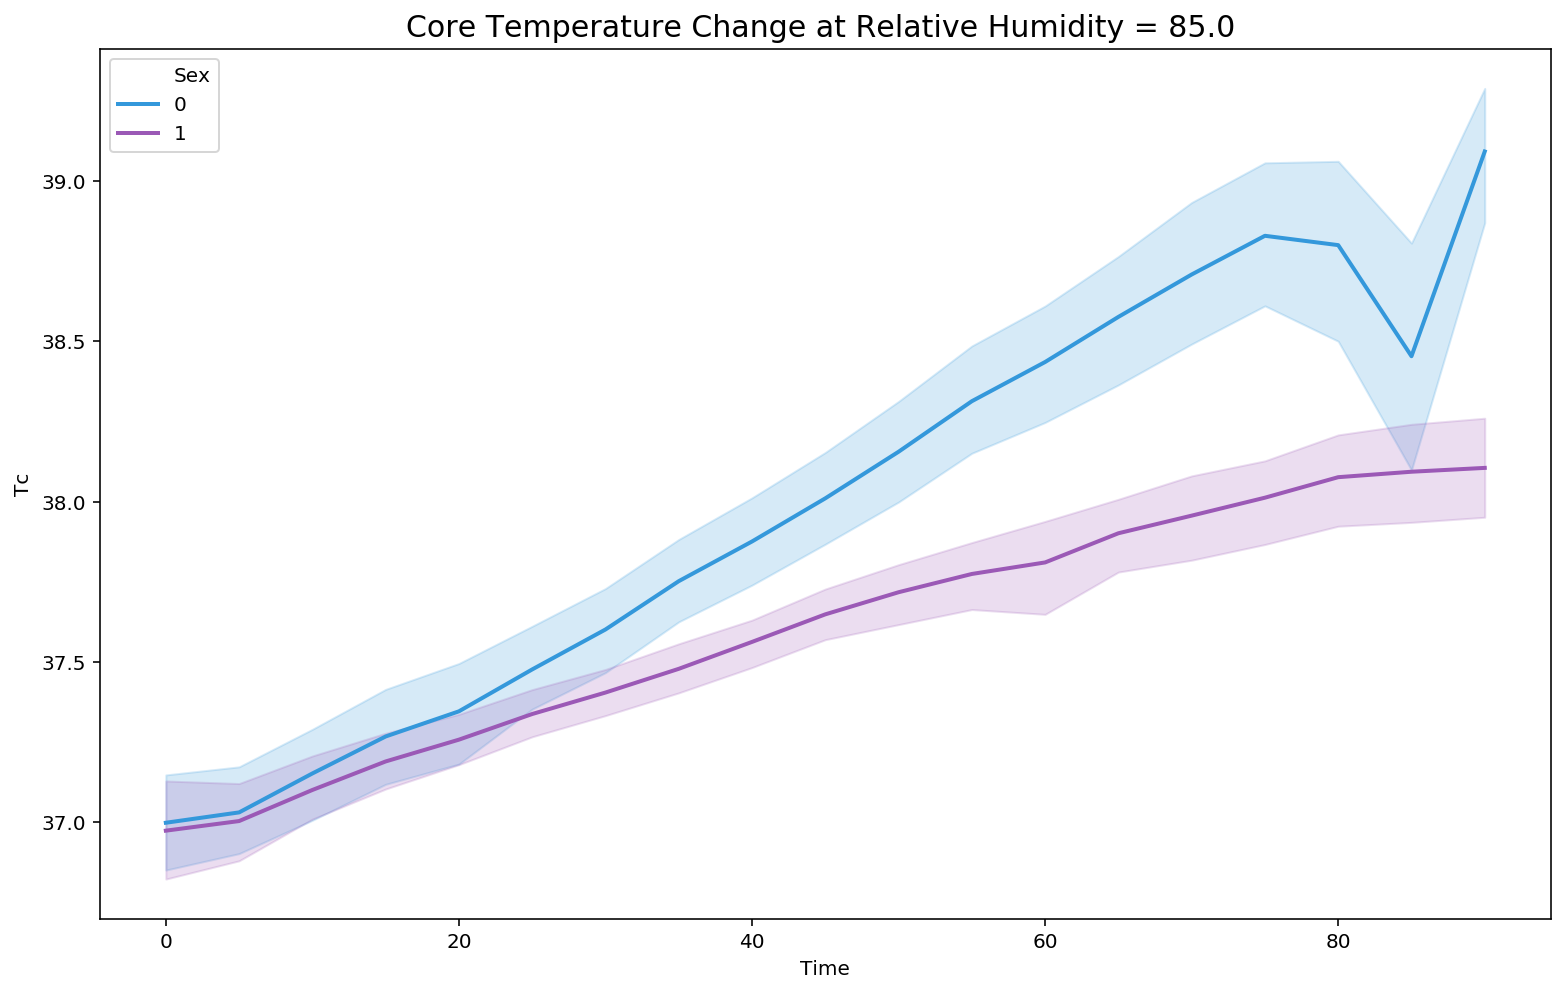

In [35]:
sns.lineplot(data=dataset[dataset['RH']==85.0],y='Tc',x= 'Time',hue='Sex')
plt.title("Core Temperature Change at Relative Humidity = 85.0 ", fontsize=15);

From the above plots we can see how the core temperature at the differnt humidity level changes and for humidity level 85.0 it crosses the threshold value of 38.2 fastest.

## Coding Challenge 11 - 

## For each humidity, please analyze whether core temp is statistically different between men & women.


For this analysis I am using t-test to check the if the mean for core temperature is statistically different for both the sex.

> ### Ho : THe mean is same.
> ### HI  : The mean is differnt

In [36]:
# Creating different dataset for RH is 55.0, 70.0, 85.0

M_55 =dataset[(dataset['Sex']==0) & (dataset['RH']==55.0)]
F_55 =dataset[(dataset['Sex']==1) & (dataset['RH']==55.0)]
M_70 =dataset[(dataset['Sex']==0) & (dataset['RH']==70.0)]
F_70 =dataset[(dataset['Sex']==1) & (dataset['RH']==70.0)]
M_85 =dataset[(dataset['Sex']==0) & (dataset['RH']==85.0)]
F_85 =dataset[(dataset['Sex']==1) & (dataset['RH']==85.0)]

In [37]:
# Creating function for plotting the distribution of core temperature

def distribution_graph(m_data,f_data,number):
    ax1 = sns.distplot(m_data)
    plt.axvline(np.mean(m_data), color='blue', linestyle='dashed', linewidth=2)
    print("Mean of Temprature for Male: {:.2f}".format(np.mean(m_data)))
    ax1 = sns.distplot(f_data)
    plt.axvline(np.mean(f_data), color='pink', linestyle='dashed', linewidth=2)
    print("Mean of Temprature for Female: {:.2f}".format(np.mean(f_data)))
    plt.xlabel('Temperature', fontsize=12)
    plt.ylabel('Frequecy', fontsize=12)
    plt.title("Temperature Distribution at Relative Humidity = {} ".format(number), fontsize=15)

Mean of Temprature for Male: 37.49
Mean of Temprature for Female: 37.35


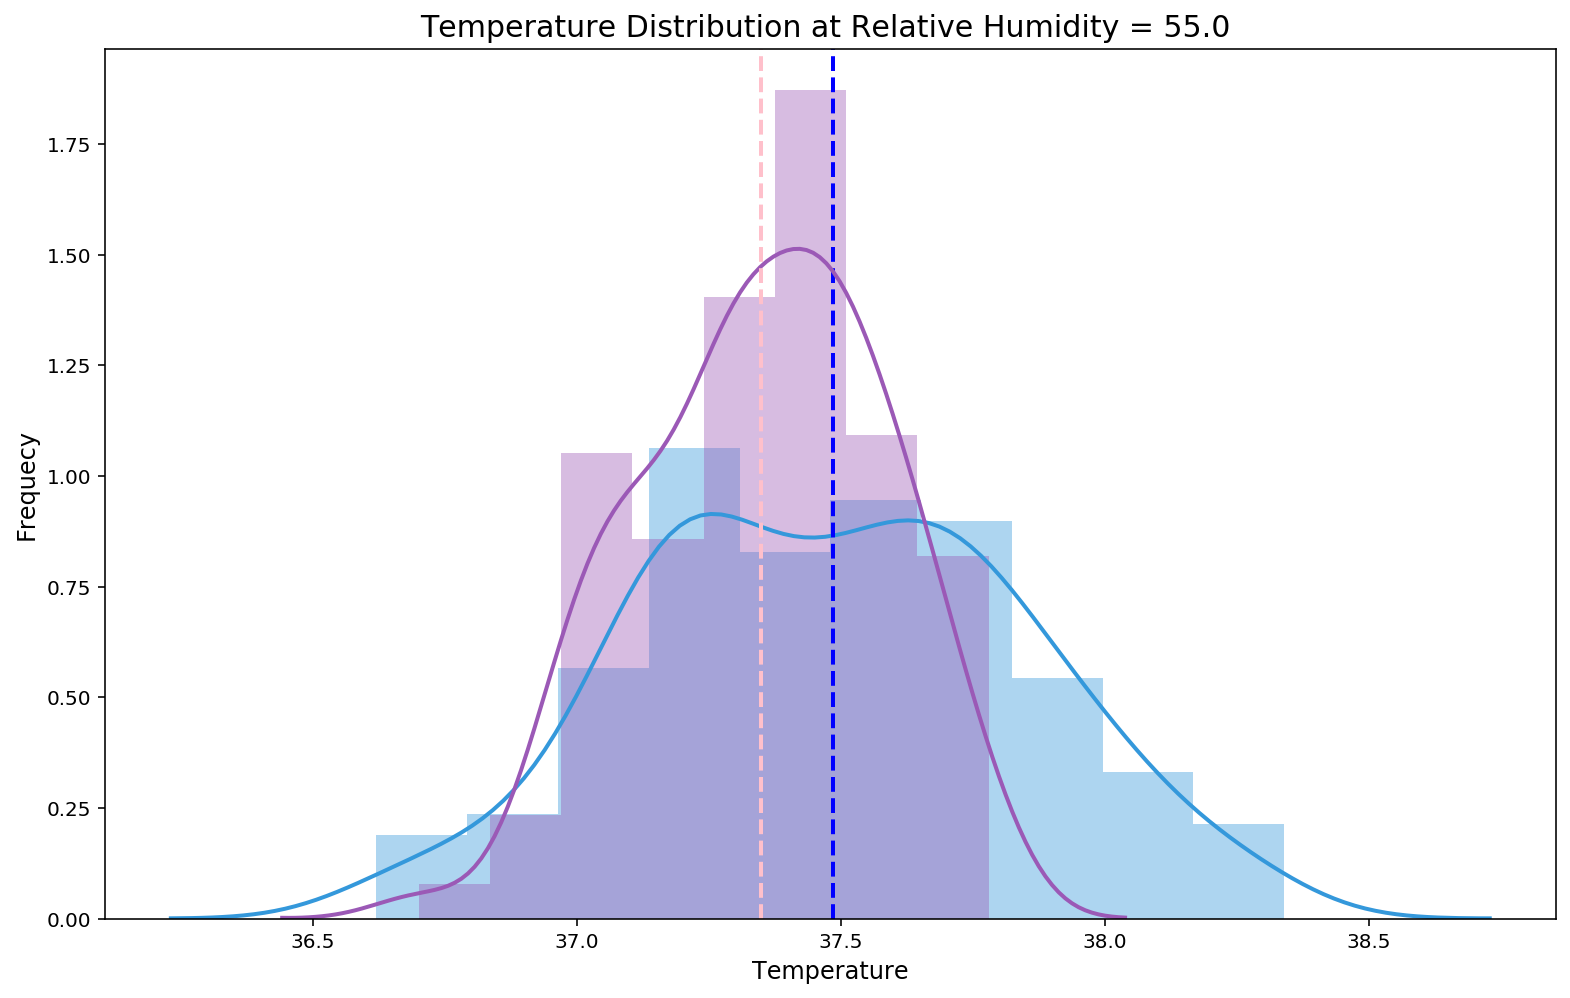

In [38]:
# Distribution at RH 55.0

distribution_graph(M_55['Tc'],F_55['Tc'],55.0)

Mean of Temprature for Male: 37.70
Mean of Temprature for Female: 37.37


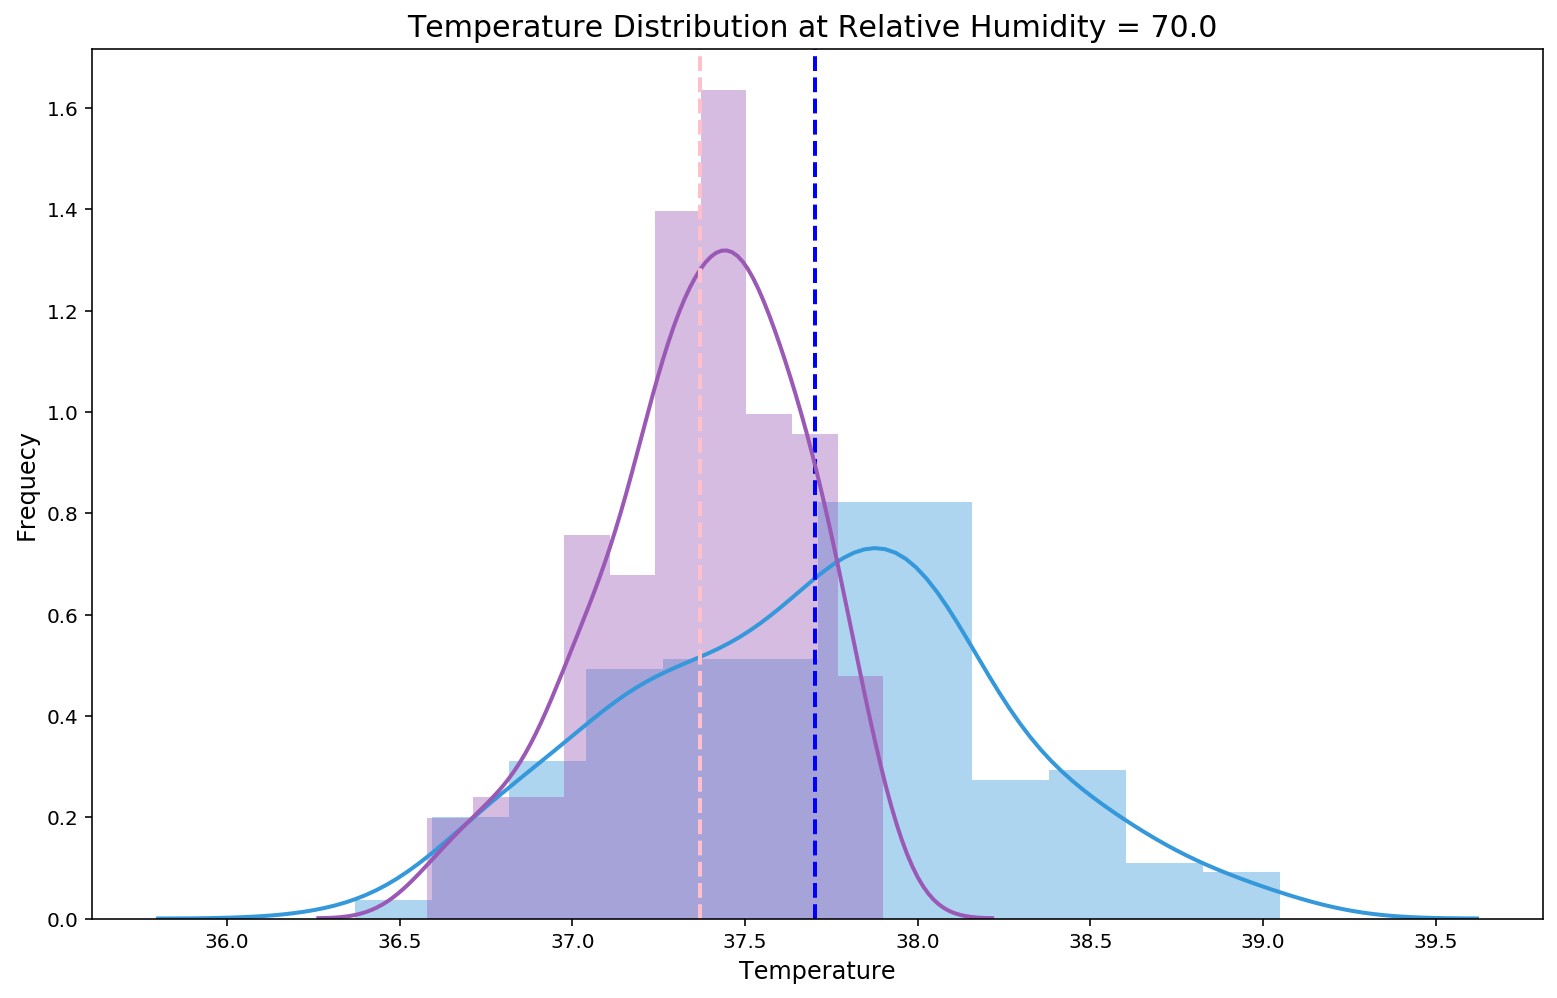

In [39]:
# Distribution at RH 70.0

distribution_graph(M_70['Tc'],F_70['Tc'],70.0)

Mean of Temprature for Male: 37.99
Mean of Temprature for Female: 37.60


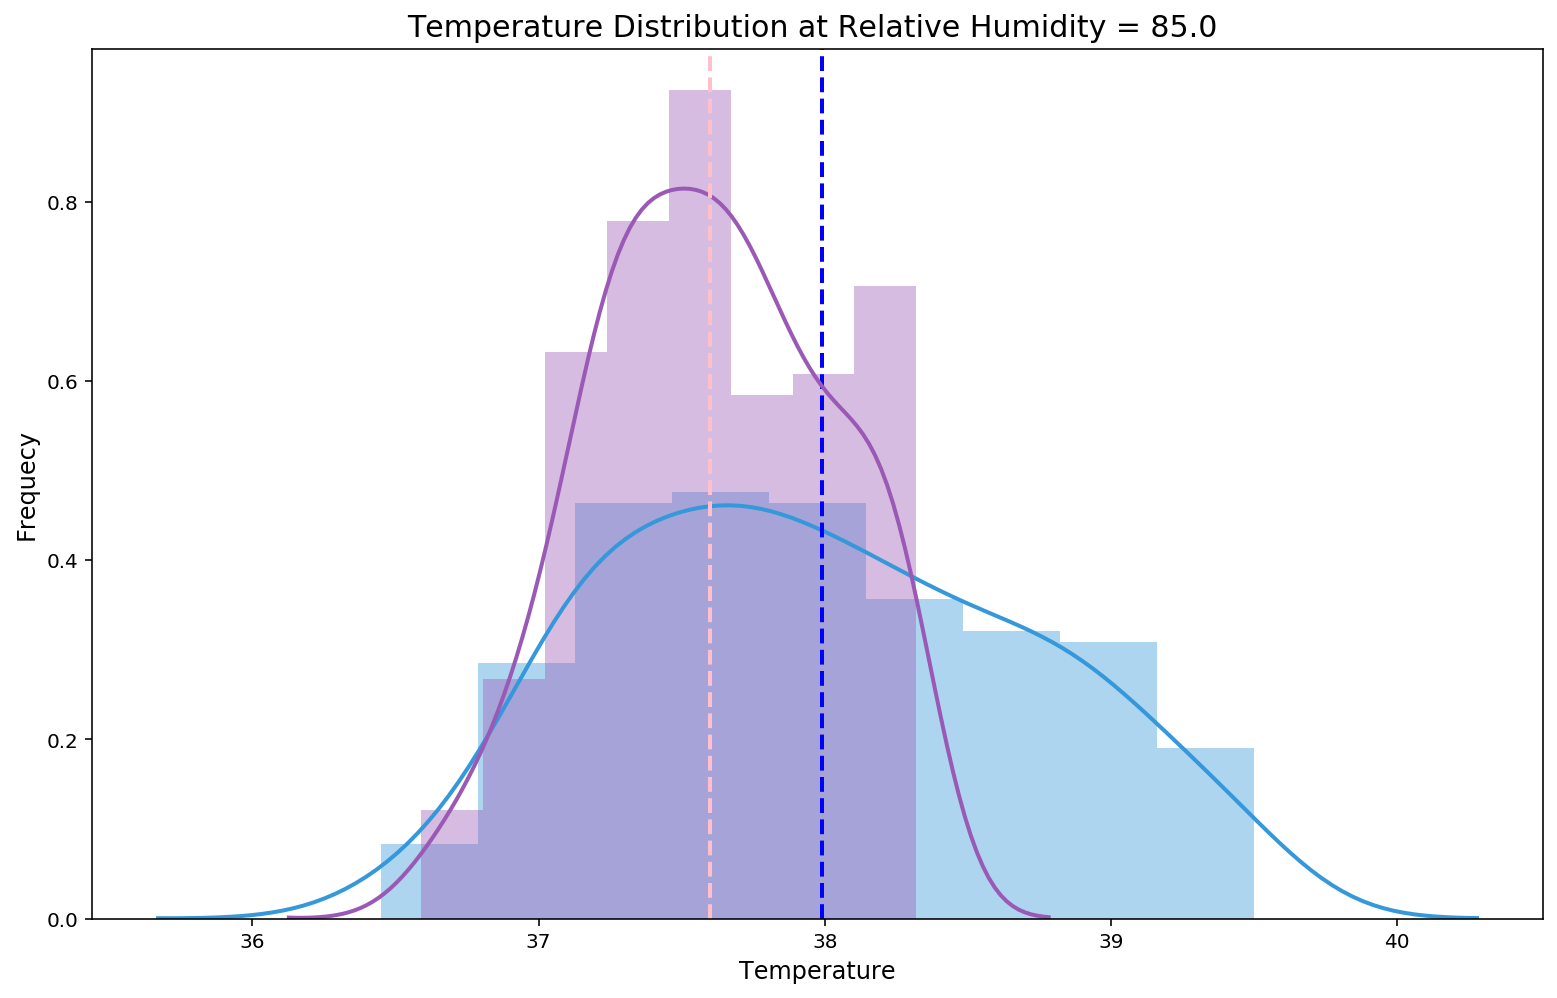

In [40]:
# Distribution at RH 85.0

distribution_graph(M_85['Tc'],F_85['Tc'],85.0)

In [41]:
# Importing library for conducting T-test

from scipy.stats import f_oneway
from scipy.stats import ttest_ind 

# Creating a function for comparing the two group

def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [42]:
# Taking the sample of 100 values for conducting T-test when RH= 55.0

compare_2_groups(np.array(M_55['Tc']),np.array(F_55['Tc']),0.5,100)

Statistics=4.438, p=0.000
Different distributions (reject H0)


In [43]:
# Taking the sample of 100 values for conducting T-test when RH= 70.0

compare_2_groups(np.array(M_70['Tc']),np.array(F_70['Tc']),0.5,100)

Statistics=7.693, p=0.000
Different distributions (reject H0)


In [44]:
# Taking the sample of 100 values for conducting T-test when RH= 85.0

compare_2_groups(np.array(M_85['Tc']),np.array(F_85['Tc']),0.5,100)

Statistics=6.513, p=0.000
Different distributions (reject H0)


## Coding Challenge 12 - 

## Do you notice anything else (physiological insights) or about the dataset that you think is important?

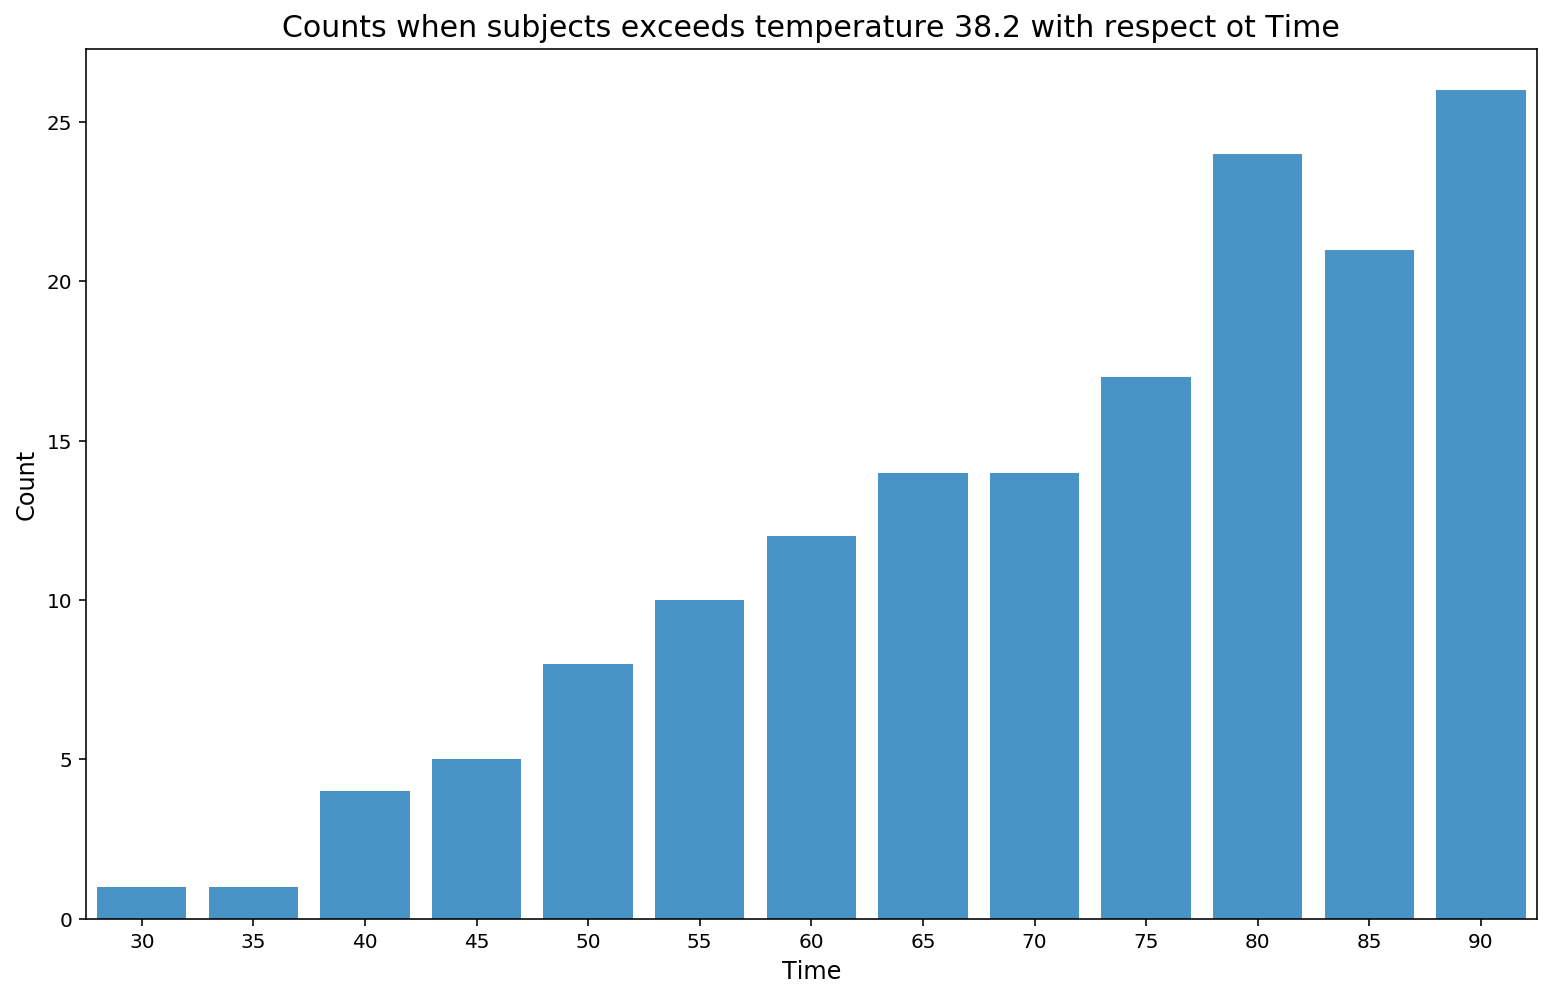

In [45]:
# Number of times temperature crossed over 38.2 at different time interval
sns.countplot(high_Tc['Time'],color='#3498db');
plt.xlabel('Time', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Counts when subjects exceeds temperature 38.2 with respect ot Time", fontsize=15);

I noticed that some of the subjects crossed the threshold body temperature eariler than the other subjects when relatively humidity is 70.0 and 85.0. We can do furhter analysis to check about the reasons for it.